<a href="https://colab.research.google.com/github/bushurumark/EUROPE-MULTI-LEAGUE-FOOTBALL-PREDICTION-APP/blob/main/OTHER_LEAGUE_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
# To impute missing values
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import LabelEncoder

### Read the dataset

In [ ]:

data = pd.read_csv('/kaggle/input/football-data/football_data2.csv')
df = data.copy()

### View the first and last 5 rows of the dataset.

In [ ]:
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Romania,Superliga,2019/2020,12/07/2019,16:30,FC Voluntari,Sepsi Sf. Gheorghe,0,0,D,...,3.07,2.65,3.08,3.07,2.51,2.96,2.90,NaN,NaN,NaN
1,Romania,Superliga,2019/2020,13/07/2019,16:00,Astra,FC Botosani,2,2,D,...,3.49,2.35,3.14,3.60,2.24,3.04,3.30,NaN,NaN,NaN
2,Romania,Superliga,2019/2020,13/07/2019,19:00,CFR Cluj,Poli Iasi,1,1,D,...,8.64,1.56,4.09,8.75,1.49,3.66,7.35,NaN,NaN,NaN
3,Romania,Superliga,2019/2020,14/07/2019,16:00,U Craiova,Academica Clinceni,3,2,H,...,8.09,1.48,4.46,9.50,1.43,4.15,7.22,NaN,NaN,NaN
4,Romania,Superliga,2019/2020,14/07/2019,19:00,FCSB,FC Hermannstadt,4,3,H,...,8.50,1.49,4.35,8.70,1.44,3.97,7.33,NaN,NaN,NaN


In [ ]:
df.tail()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
8697,Switzerland,Super League,2024/2025,21/04/2025,15:30,Basel,Yverdon,5,0,H,...,6.21,1.46,5.40,7.50,1.40,5.09,6.36,1.47,5.3,7.2
8698,Switzerland,Super League,2024/2025,21/04/2025,15:30,Lausanne,Lugano,2,0,H,...,3.09,2.51,3.50,3.09,2.34,3.38,2.92,2.42,3.6,3.2
8699,Switzerland,Super League,2024/2025,21/04/2025,15:30,Servette,Luzern,2,1,H,...,3.73,2.02,3.91,3.73,1.93,3.77,3.57,1.95,4.0,4.0
8700,Switzerland,Super League,2024/2025,21/04/2025,15:30,St. Gallen,Sion,1,0,H,...,4.53,1.85,4.06,4.53,1.76,3.91,4.17,1.80,4.2,4.7
8701,Switzerland,Super League,2024/2025,21/04/2025,15:30,Young Boys,Zurich,2,1,H,...,3.81,1.90,4.10,4.10,1.83,3.89,3.81,1.92,4.0,4.1


In [ ]:
df.sample(10)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
2408,Russia,Premier League,2021/2022,25/10/2021,17:00,Lokomotiv Moscow,Sochi,2,1,H,...,2.48,3.10,3.59,2.70,2.89,3.26,2.43,NaN,NaN,NaN
2373,Russia,Premier League,2021/2022,19/09/2021,17:00,Sochi,Dynamo Moscow,0,1,A,...,3.14,2.74,3.47,3.22,2.35,3.28,3.02,NaN,NaN,NaN
6187,Austria,Bundesliga,2023/2024,18/05/2024,16:00,Altach,A. Lustenau,2,2,D,...,5.40,1.69,4.33,5.90,1.62,3.95,5.13,NaN,NaN,NaN
1579,Romania,Superliga,2024/2025,10/08/2024,20:00,Gloria Buzau,FC Rapid Bucuresti,1,1,D,...,1.88,4.29,3.65,1.98,3.92,3.49,1.87,4.30,3.7,1.99
5175,Mexico,Liga MX,2024/2025,29/03/2025,23:00,Toluca,Pachuca,3,2,H,...,4.30,1.85,4.41,4.33,1.72,4.14,4.17,1.78,4.4,4.60
4035,Mexico,Liga MX,2021/2022,02/12/2021,03:00,Tigres UANL,Club Leon,2,1,H,...,3.91,2.16,3.30,3.77,2.10,3.18,3.52,NaN,NaN,NaN
5606,Austria,Bundesliga,2020/2021,24/05/2021,16:00,Hartberg,Austria Vienna,0,3,A,...,2.53,2.89,3.79,2.53,2.75,3.52,2.42,NaN,NaN,NaN
5477,Austria,Bundesliga,2020/2021,13/12/2020,13:30,Wolfsberger AC,Austria Vienna,3,2,H,...,3.81,2.07,3.83,3.90,1.94,3.63,3.60,NaN,NaN,NaN
2300,Russia,Premier League,2020/2021,08/05/2021,14:30,Arsenal Tula,Rubin Kazan,2,4,A,...,2.78,3.07,3.29,2.85,2.81,3.04,2.66,NaN,NaN,NaN
2530,Russia,Premier League,2021/2022,07/05/2022,12:00,Ural,Spartak Moscow,1,3,A,...,2.24,3.00,3.70,2.49,2.89,3.51,2.39,NaN,NaN,NaN


## Understand the shape of the dataset.

In [ ]:
df.shape

(8702, 22)

## Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  8702 non-null   object 
 1   League   8702 non-null   object 
 2   Season   8702 non-null   object 
 3   Date     8702 non-null   object 
 4   Time     8702 non-null   object 
 5   Home     8702 non-null   object 
 6   Away     8702 non-null   object 
 7   HG       8702 non-null   int64  
 8   AG       8702 non-null   int64  
 9   Res      8702 non-null   object 
 10  PSCH     8663 non-null   float64
 11  PSCD     8663 non-null   float64
 12  PSCA     8663 non-null   float64
 13  MaxCH    8699 non-null   float64
 14  MaxCD    8699 non-null   float64
 15  MaxCA    8699 non-null   float64
 16  AvgCH    8699 non-null   float64
 17  AvgCD    8699 non-null   float64
 18  AvgCA    8699 non-null   float64
 19  BFECH    1138 non-null   float64
 20  BFECD    1138 non-null   float64
 21  BFECA    1138 

#### Fixing the data types

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away', 'Res'], dtype='object')

In [ ]:
for i in cols.columns:
    if i != 'Date': # Exclude 'Date' from categorical conversion
        df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  8702 non-null   category
 1   League   8702 non-null   category
 2   Season   8702 non-null   category
 3   Date     8702 non-null   object  
 4   Time     8702 non-null   category
 5   Home     8702 non-null   category
 6   Away     8702 non-null   category
 7   HG       8702 non-null   int64   
 8   AG       8702 non-null   int64   
 9   Res      8702 non-null   category
 10  PSCH     8663 non-null   float64 
 11  PSCD     8663 non-null   float64 
 12  PSCA     8663 non-null   float64 
 13  MaxCH    8699 non-null   float64 
 14  MaxCD    8699 non-null   float64 
 15  MaxCA    8699 non-null   float64 
 16  AvgCH    8699 non-null   float64 
 17  AvgCD    8699 non-null   float64 
 18  AvgCA    8699 non-null   float64 
 19  BFECH    1138 non-null   float64 
 20  BFECD    1138 non-null   float

### Summary of the dataset.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HG,8702.0,1.497817,1.270525,0.00,1.0000,1.00,2.00,10.00
AG,8702.0,1.219375,1.124898,0.00,0.0000,1.00,2.00,8.00
PSCH,8663.0,2.705714,1.839709,1.02,1.7900,2.29,3.10,48.68
PSCD,8663.0,3.853169,0.988753,2.48,3.3500,3.64,4.03,18.55
PSCA,8663.0,4.060200,2.951226,1.06,2.4300,3.33,4.73,50.37
MaxCH,8699.0,2.847381,2.623205,1.03,1.8400,2.35,3.19,91.00
MaxCD,8699.0,3.999626,1.243469,2.48,3.4500,3.74,4.13,33.00
MaxCA,8699.0,4.334490,4.308425,1.08,2.5000,3.41,4.93,126.00
AvgCH,8699.0,2.609878,1.694638,1.01,1.7600,2.23,2.97,39.93
AvgCD,8699.0,3.727223,0.931188,2.37,3.2600,3.52,3.88,20.63


In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
Country,8702,6,Mexico,1966
League,8702,6,Superliga,3016
Season,8702,6,2023/2024,1523
Time,8702,101,16:00,1066
Home,8702,126,Club America,120
Away,8702,127,Club America,121
Res,8702,3,H,3741


### **Feature Engineering**

In [ ]:
# Create encoder
le = LabelEncoder()

# Encode the 'Res' column (converts H, D, A to numbers)
df['Res'] = le.fit_transform(df['Res'])

In [ ]:
# Show the mapping
print("Encoding mapping:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {original} → {encoded}")

Encoding mapping:
  A → 0
  D → 1
  H → 2


In [ ]:
# Verify encoding worked
print("\nValue counts after encoding:")
print(df['Res'].value_counts().sort_index())


Value counts after encoding:
Res
0    2654
1    2307
2    3741
Name: count, dtype: int64


In [ ]:
#label encoding for teams
all_teams = pd.concat([df['Home'], df['Away']]).unique()
le.fit(all_teams)
df['Home'] = le.transform(df['Home'])
df['Away'] = le.transform(df['Away'])

In [ ]:
#label encoding for leagues and countries
all_leagues_countries = pd.concat([df['League'], df['Country']]).unique()
le.fit(all_leagues_countries)
df['League'] = le.transform(df['League'])
df['Country'] = le.transform(df['Country'])

In [ ]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(['Date', 'Time']).reset_index(drop=True)

In [ ]:
print(f"Earliest match: {df['Date'].min()}")
print(f"Latest match: {df['Date'].max()}")
print(f"Total matches: {len(df)}")

Earliest match: 2019-07-12 00:00:00
Latest match: 2025-04-28 00:00:00
Total matches: 8702


In [ ]:
def get_team_result_in_match(row, team):
    """
    Determine result from perspective of a specific team in a match
    Returns: points (3 for win, 1 for draw, 0 for loss), goals_scored, goals_conceded
    """
    if row['Home'] == team:
        if row['Res'] == 2: # 'H' is encoded as 2
            return 3, row['HG'], row['AG']  # Win, goals_for, goals_against
        elif row['Res'] == 1: # 'D' is encoded as 1
            return 1, row['HG'], row['AG']  # Draw
        else:
            return 0, row['HG'], row['AG']  # Loss

    elif row['Away'] == team:
        if row['Res'] == 0: # 'A' is encoded as 0
            return 3, row['AG'], row['HG']  # Win
        elif row['Res'] == 1: # 'D' is encoded as 1
            return 1, row['AG'], row['HG']  # Draw
        else:
            return 0, row['AG'], row['HG']  # Loss

    return None, None, None  # Team not in this match

In [ ]:
# Home team features
df['home_points_last5'] = 0.0
df['home_avg_scored_last5'] = 0.0
df['home_avg_conceded_last5'] = 0.0
df['home_wins_last5'] = 0

# Away team features
df['away_points_last5'] = 0.0
df['away_avg_scored_last5'] = 0.0
df['away_avg_conceded_last5'] = 0.0
df['away_wins_last5'] = 0

In [ ]:
# First, ensure League column is string type (do this once at the beginning)
df['League'] = df['League'].astype(int)

# This is the key implementation - NO FUTURE DATA USED
for idx in range(len(df)):
    if idx % 1000 == 0:
        print(f"Processing match {idx}/{len(df)}")

    current_match = df.iloc[idx]
    home_team = current_match['Home']
    away_team = current_match['Away']
    league = int(current_match['League'])  # Convert to string

    # Find previous matches for home team (BEFORE current date)
    home_prev_matches = df[
        ((df['Home'] == home_team) | (df['Away'] == home_team)) &
        (df['League'] == league) &
        (df.index < idx)  # Critical: only matches before current one
    ].tail(5)  # Last 5 matches

    # Find previous matches for away team
    away_prev_matches = df[
        ((df['Home'] == away_team) | (df['Away'] == away_team)) &
        (df['League'] == league) &
        (df.index < idx)
    ].tail(5)

    # Calculate home team stats
    if len(home_prev_matches) > 0:
        points = []
        scored = []
        conceded = []
        wins = 0

        for _, match in home_prev_matches.iterrows():
            pts, gf, ga = get_team_result_in_match(match, home_team)
            points.append(pts)
            scored.append(gf)
            conceded.append(ga)
            if pts == 3:
                wins += 1

        df.at[idx, 'home_points_last5'] = sum(points)
        df.at[idx, 'home_avg_scored_last5'] = np.mean(scored)
        df.at[idx, 'home_avg_conceded_last5'] = np.mean(conceded)
        df.at[idx, 'home_wins_last5'] = wins

    # Calculate away team stats
    if len(away_prev_matches) > 0:
        points = []
        scored = []
        conceded = []
        wins = 0

        for _, match in away_prev_matches.iterrows():
            pts, gf, ga = get_team_result_in_match(match, away_team)
            points.append(pts)
            scored.append(gf)
            conceded.append(ga)
            if pts == 3:
                wins += 1

        df.at[idx, 'away_points_last5'] = sum(points)
        df.at[idx, 'away_avg_scored_last5'] = np.mean(scored)
        df.at[idx, 'away_avg_conceded_last5'] = np.mean(conceded)
        df.at[idx, 'away_wins_last5'] = wins

Processing match 0/8702
Processing match 1000/8702
Processing match 2000/8702
Processing match 3000/8702
Processing match 4000/8702
Processing match 5000/8702
Processing match 6000/8702
Processing match 7000/8702
Processing match 8000/8702


In [ ]:
# Form difference (home form - away form)
df['form_diff_points'] = df['home_points_last5'] - df['away_points_last5']
df['form_diff_wins'] = df['home_wins_last5'] - df['away_wins_last5']

# Goal difference in form
df['home_goal_diff_last5'] = df['home_avg_scored_last5'] - df['home_avg_conceded_last5']
df['away_goal_diff_last5'] = df['away_avg_scored_last5'] - df['away_avg_conceded_last5']
df['form_goal_diff'] = df['home_goal_diff_last5'] - df['away_goal_diff_last5']

In [ ]:
# For teams with less than 5 previous matches, use season average or 0
# You can fill missing values with 0 or league averages
for col in ['home_points_last5', 'away_points_last5',
            'home_avg_scored_last5', 'away_avg_scored_last5',
            'home_avg_conceded_last5', 'away_avg_conceded_last5']:
    df[col] = df[col].fillna(0)

In [ ]:
# Quick check: for each match, verify historical stats only use previous matches
test_idx = 100  # Test a random match
test_match = df.iloc[test_idx]
# Convert just this test date to datetime
test_date = pd.to_datetime(test_match['Date'], format='%d/%m/%Y')

# Get all home team matches
home_team_matches = df[df['Home'] == test_match['Home']]
# Check if any historical match has later date
historical_matches = home_team_matches[home_team_matches.index < test_idx]

if len(historical_matches) > 0:
    # Convert historical dates to datetime for comparison
    historical_dates = pd.to_datetime(historical_matches['Date'], format='%d/%m/%Y')

    if historical_dates.max() < test_date:
        print("✓ No data leakage verified")
    else:
        print("DATA LEAKAGE DETECTED!")
        print(f"Latest historical date: {historical_dates.max()}")
        print(f"Current match date: {test_date}")

✓ No data leakage verified


In [ ]:
df.head(30)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,home_wins_last5,away_points_last5,away_avg_scored_last5,away_avg_conceded_last5,away_wins_last5,form_diff_points,form_diff_wins,home_goal_diff_last5,away_goal_diff_last5,form_goal_diff
0,7,10,2019/2020,2019-07-12,16:30,37,89,0,0,1,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
1,8,6,2019/2020,2019-07-12,18:00,9,30,1,1,1,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
2,3,10,2019/2020,2019-07-12,18:00,64,31,1,0,2,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
3,8,6,2019/2020,2019-07-13,14:30,113,110,3,2,2,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
4,7,10,2019/2020,2019-07-13,16:00,10,33,2,2,1,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
5,8,6,2019/2020,2019-07-13,17:00,95,93,1,0,2,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
6,7,10,2019/2020,2019-07-13,19:00,18,76,1,1,1,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
7,8,6,2019/2020,2019-07-13,19:30,39,71,2,1,2,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
8,3,10,2019/2020,2019-07-14,11:00,94,80,2,1,2,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
9,3,10,2019/2020,2019-07-14,13:00,49,69,0,3,0,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country                  8702 non-null   int64         
 1   League                   8702 non-null   int64         
 2   Season                   8702 non-null   category      
 3   Date                     8702 non-null   datetime64[ns]
 4   Time                     8702 non-null   category      
 5   Home                     8702 non-null   int64         
 6   Away                     8702 non-null   int64         
 7   HG                       8702 non-null   int64         
 8   AG                       8702 non-null   int64         
 9   Res                      8702 non-null   int64         
 10  PSCH                     8663 non-null   float64       
 11  PSCD                     8663 non-null   float64       
 12  PSCA                     8663 non-

**Dropping columns which are not adding any information.**

In [ ]:
df.drop(["Season","Time","BFECH","BFECD","BFECA"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country                  8702 non-null   int64         
 1   League                   8702 non-null   int64         
 2   Date                     8702 non-null   datetime64[ns]
 3   Home                     8702 non-null   int64         
 4   Away                     8702 non-null   int64         
 5   HG                       8702 non-null   int64         
 6   AG                       8702 non-null   int64         
 7   Res                      8702 non-null   int64         
 8   PSCH                     8663 non-null   float64       
 9   PSCD                     8663 non-null   float64       
 10  PSCA                     8663 non-null   float64       
 11  MaxCH                    8699 non-null   float64       
 12  MaxCD                    8699 non-

In [ ]:
df.sample(10)

,Country,League,Date,Home,Away,HG,AG,Res,PSCH,PSCD,...,home_wins_last5,away_points_last5,away_avg_scored_last5,away_avg_conceded_last5,away_wins_last5,form_diff_points,form_diff_wins,home_goal_diff_last5,away_goal_diff_last5,form_goal_diff
281,7,10,2019-08-31,42,76,3,2,2,1.83,3.65,...,3,11.0,1.6,0.6,3,0.0,0,1.6,1.0,0.6
1310,8,6,2020-07-15,125,71,4,1,2,1.23,6.23,...,4,1.0,0.0,2.2,0,12.0,4,1.0,-2.2,3.2
245,3,10,2019-08-25,94,64,0,2,0,3.33,3.66,...,1,13.0,1.4,0.4,4,-7.0,-3,0.4,1.0,-0.6
947,5,4,2020-02-23,67,22,0,1,0,1.87,3.80,...,0,10.0,1.2,0.8,3,-8.0,-3,-0.8,0.4,-1.2
1182,0,1,2020-06-27,102,8,0,1,0,3.11,3.58,...,1,9.0,1.4,0.6,2,-4.0,-1,0.2,0.8,-0.6
6991,11,9,2024-04-02,59,16,2,0,2,1.85,3.94,...,5,5.0,1.4,2.0,1,10.0,4,1.6,-0.6,2.2
7127,7,10,2024-04-23,33,28,2,1,2,2.82,2.85,...,2,5.0,0.6,1.2,1,2.0,1,0.0,-0.6,0.6
2758,5,4,2021-05-10,23,103,2,2,1,1.52,4.45,...,4,3.0,1.2,1.8,1,9.0,3,1.0,-0.6,1.6
2790,11,9,2021-05-15,16,126,4,0,2,1.73,4.13,...,2,5.0,1.8,1.8,1,3.0,1,0.2,0.0,0.2
125,11,9,2019-08-04,90,60,1,0,2,1.94,4.00,...,0,4.0,1.0,0.0,1,-2.0,-1,0.0,1.0,-1.0


**Let's look at the unqiue values of all the categories**

In [ ]:
cols_cat= df.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

## Exploratory Data Analysis (EDA)

### Univariate analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

### Numerical Columns

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

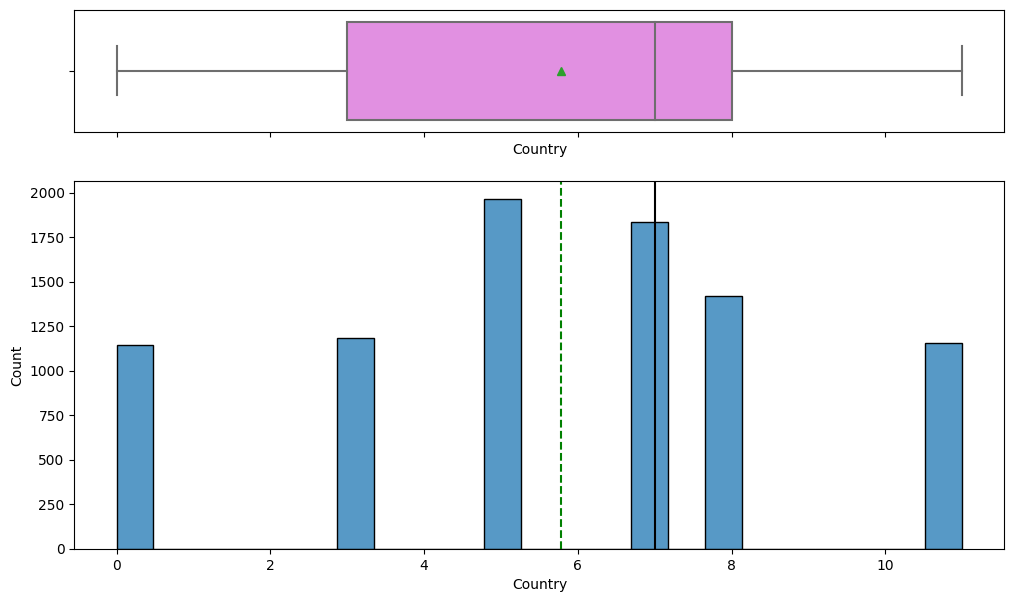

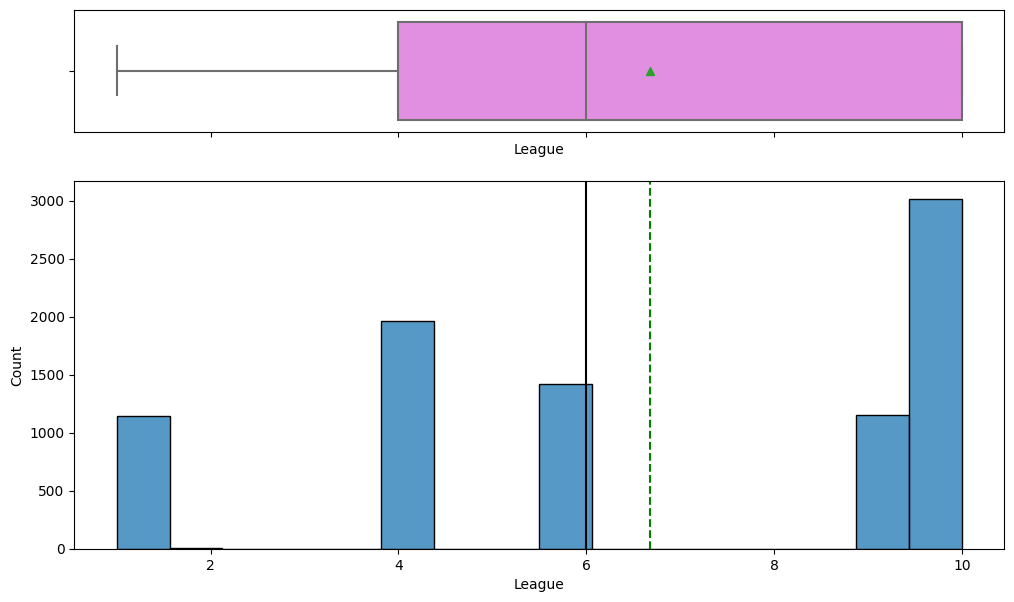

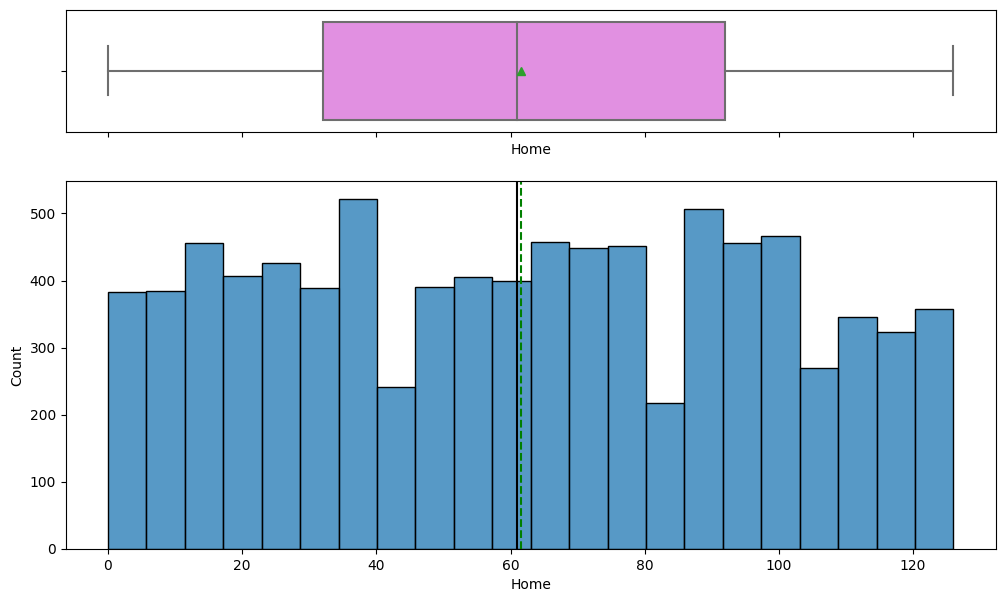

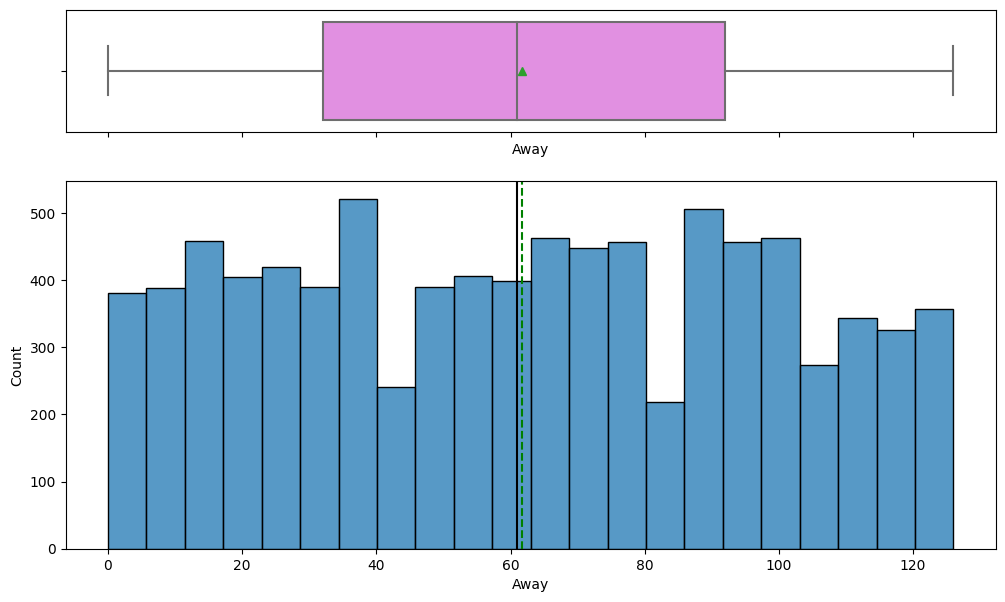

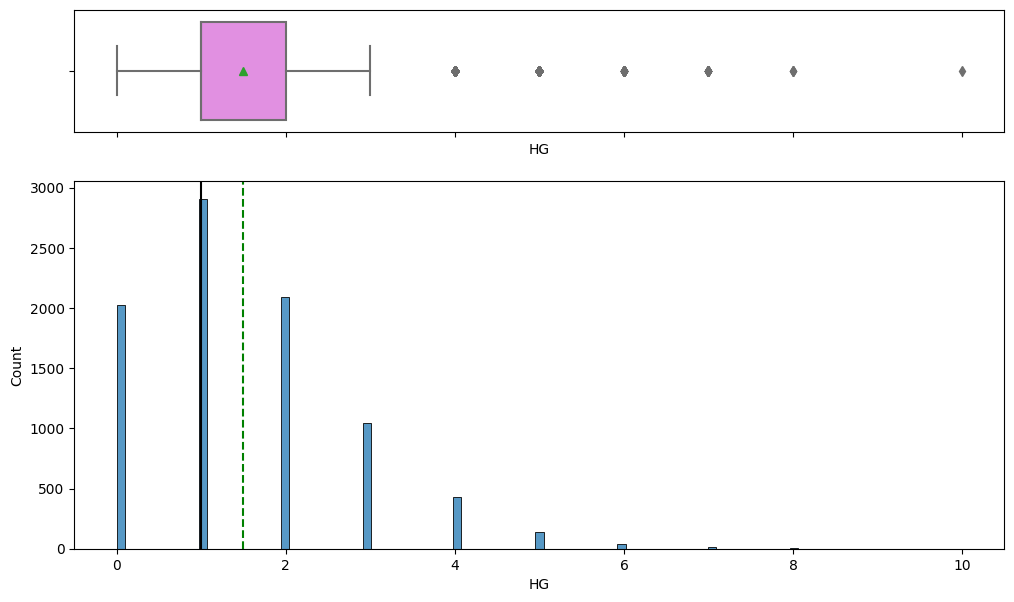

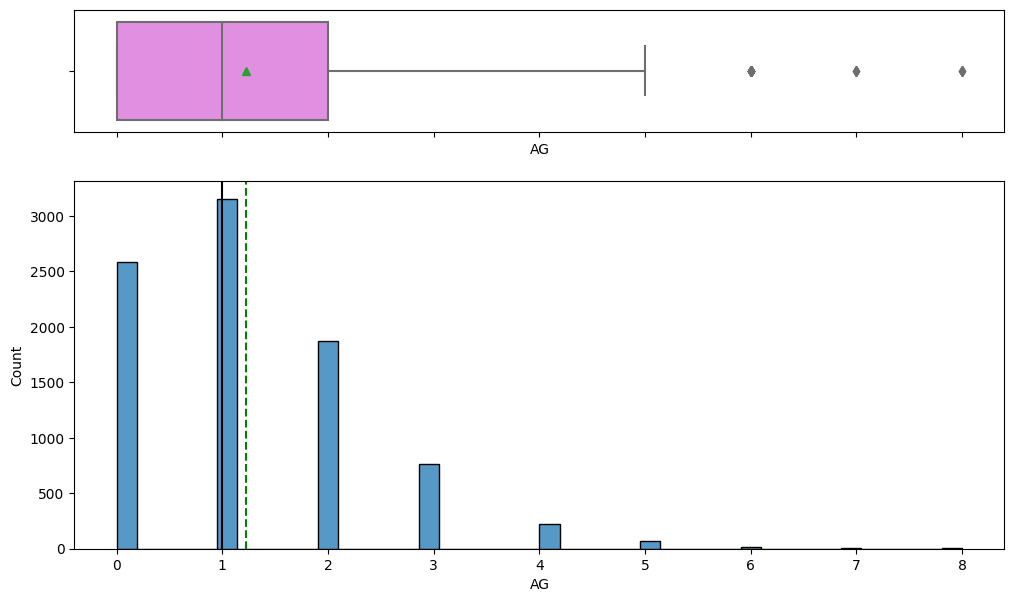

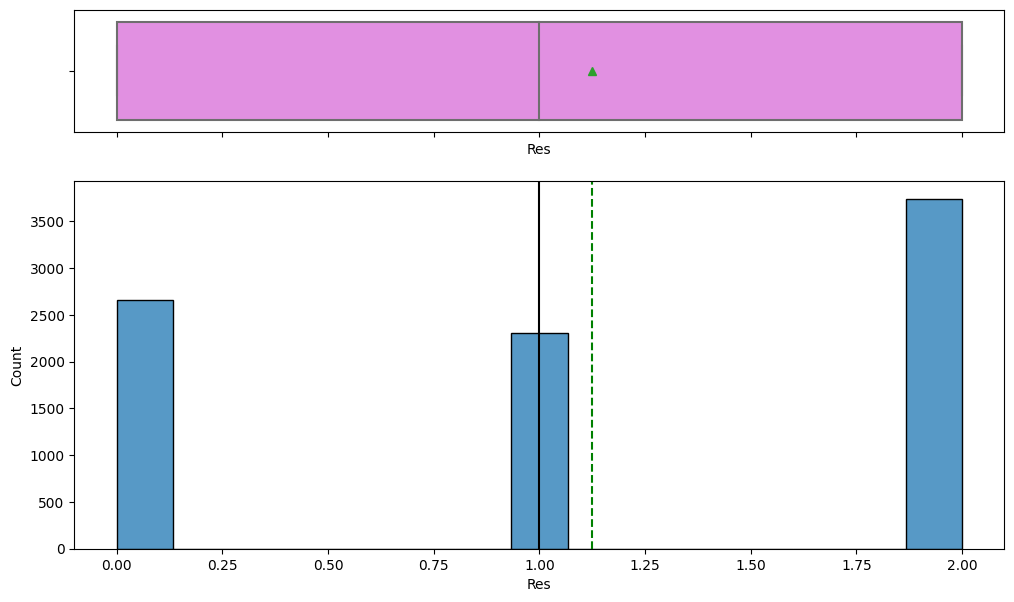

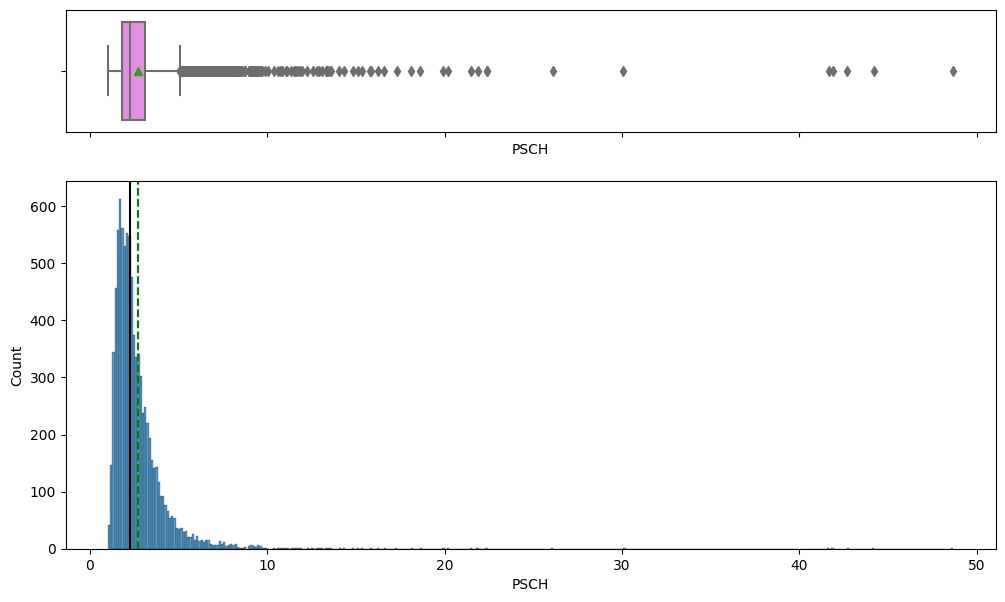

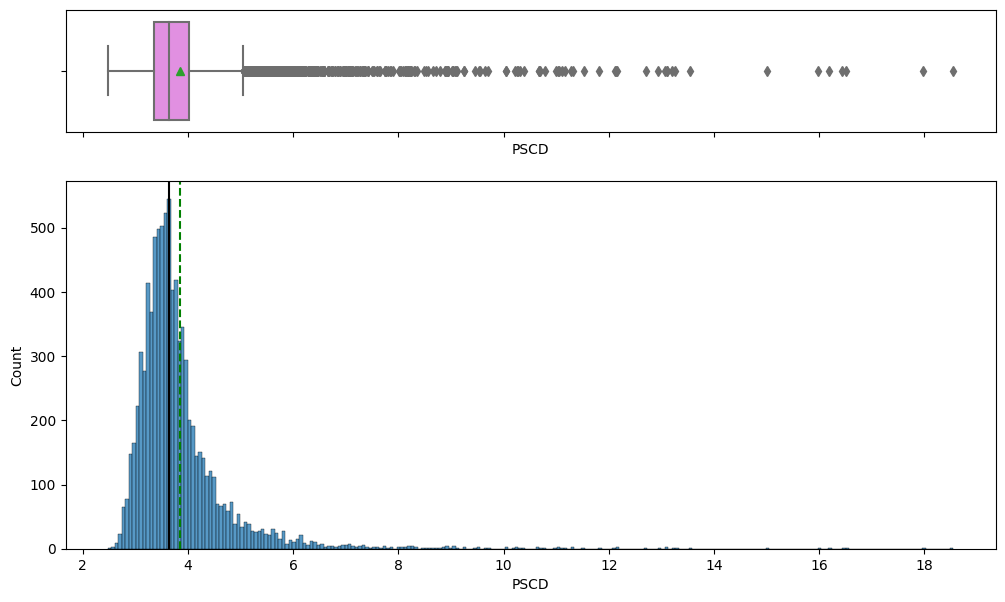

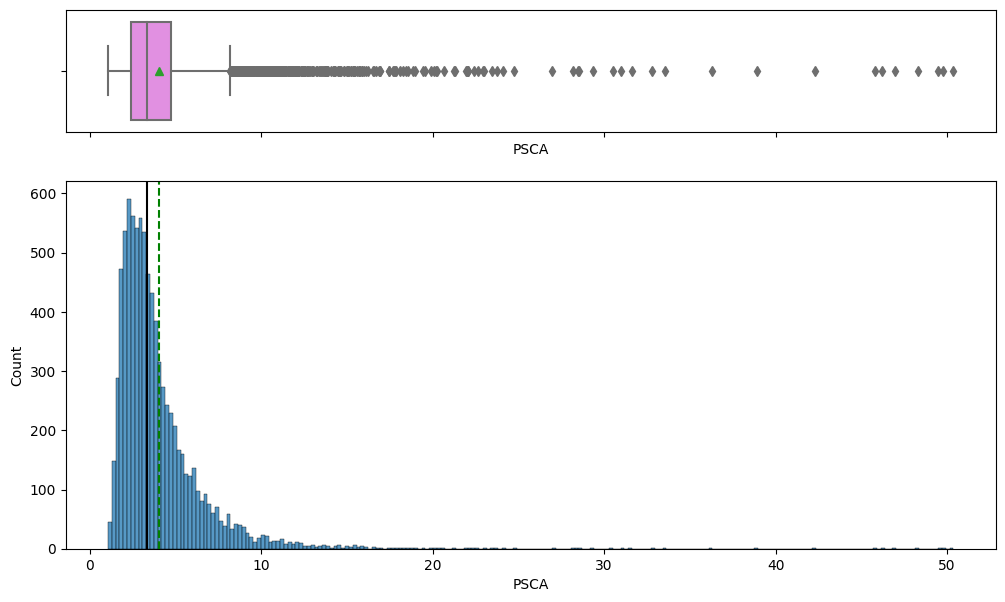

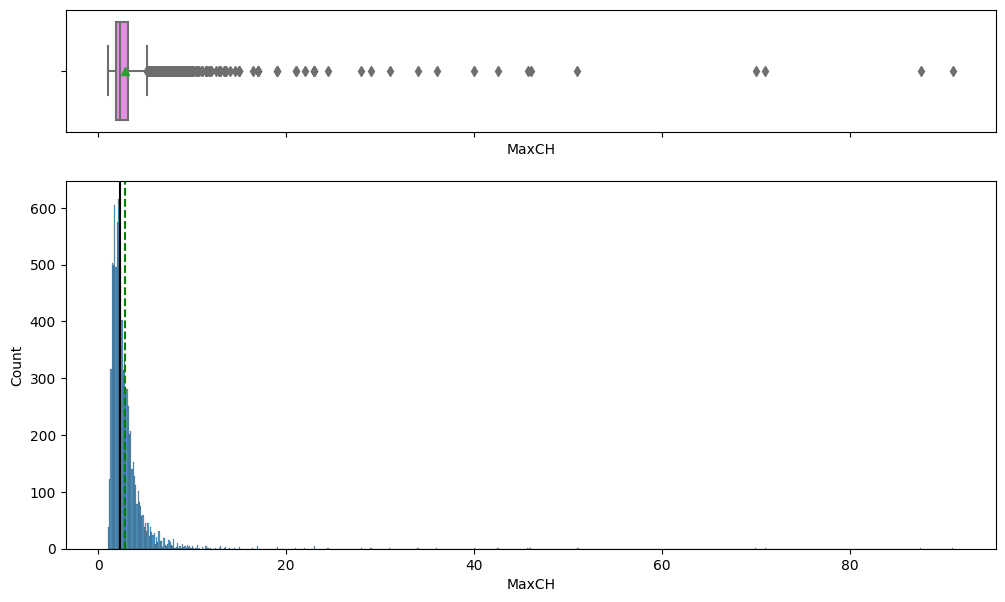

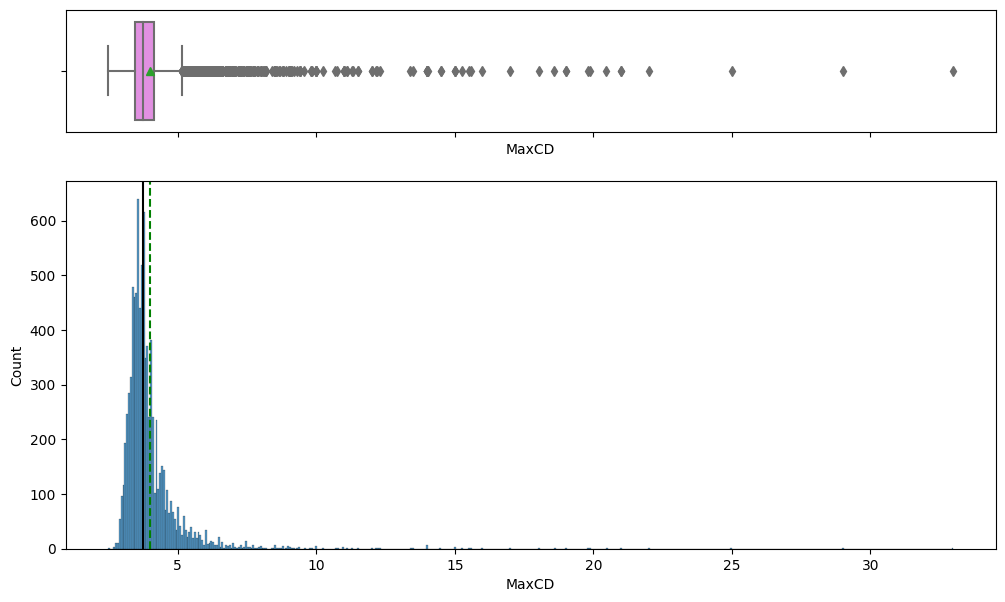

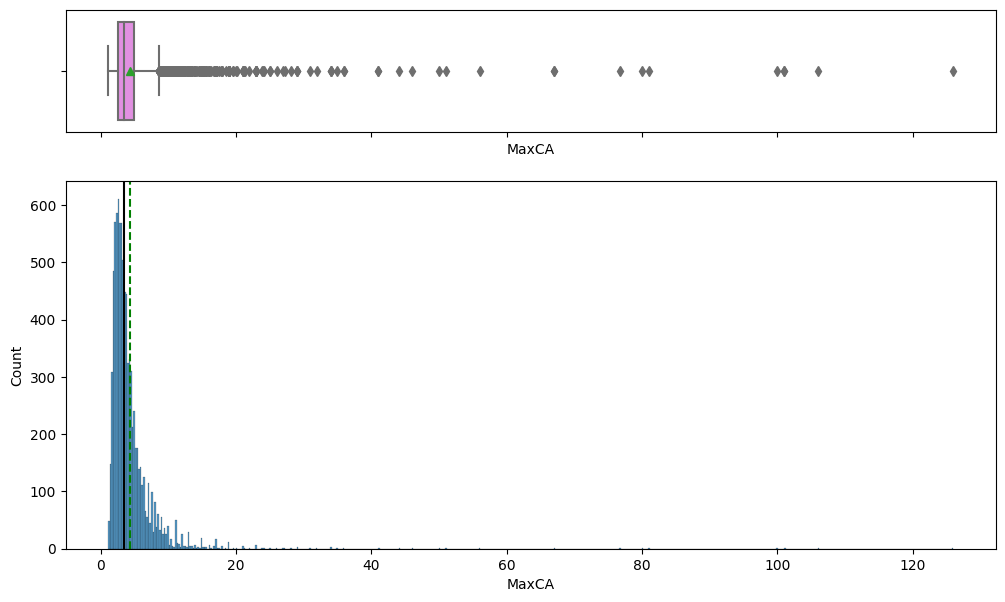

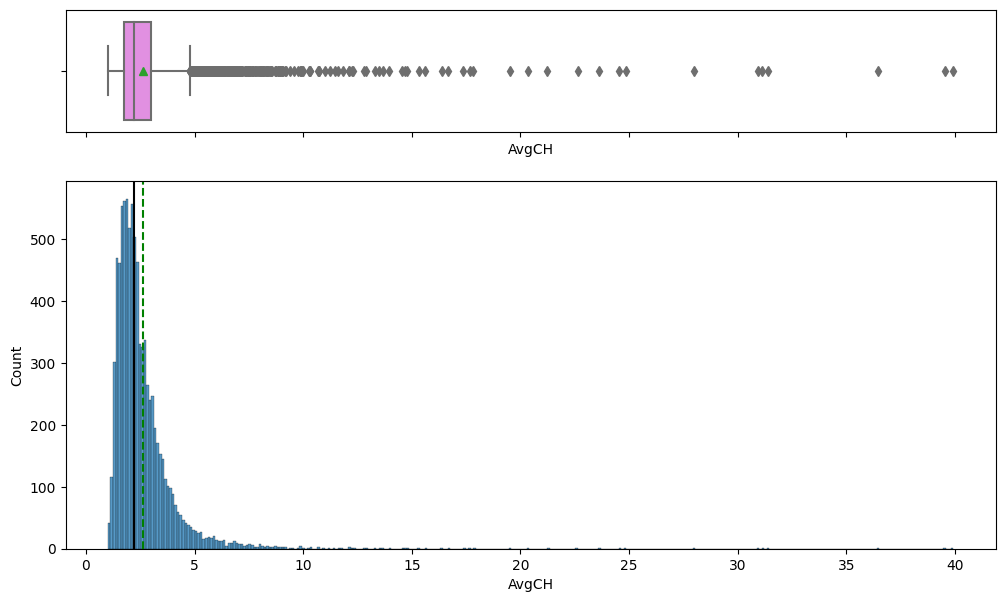

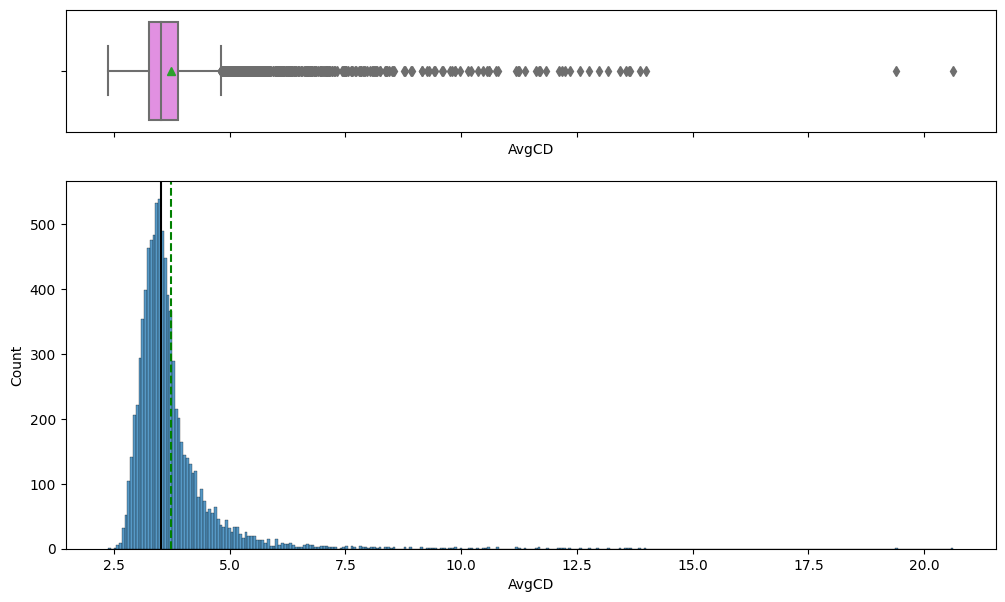

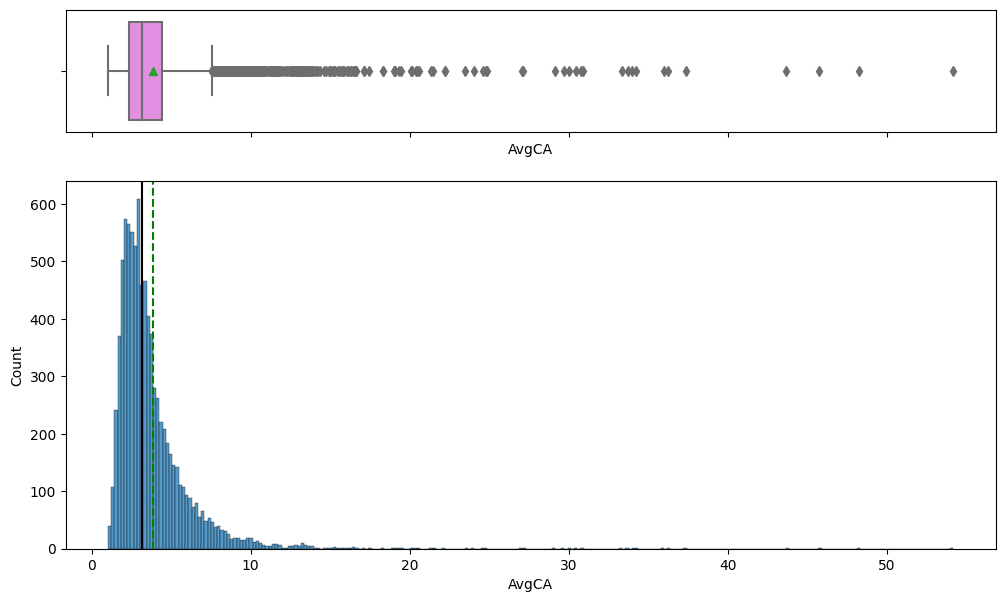

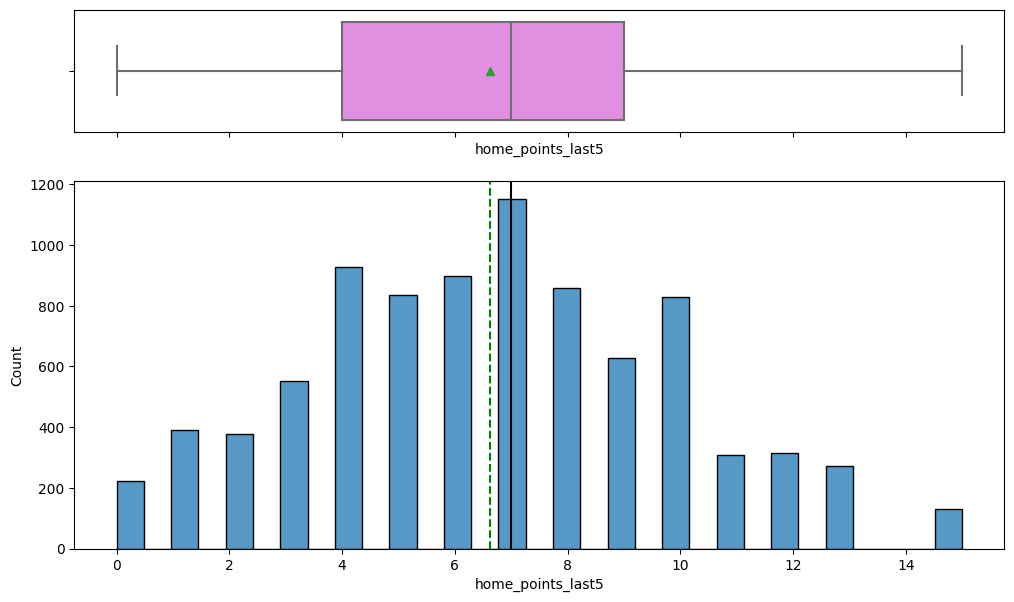

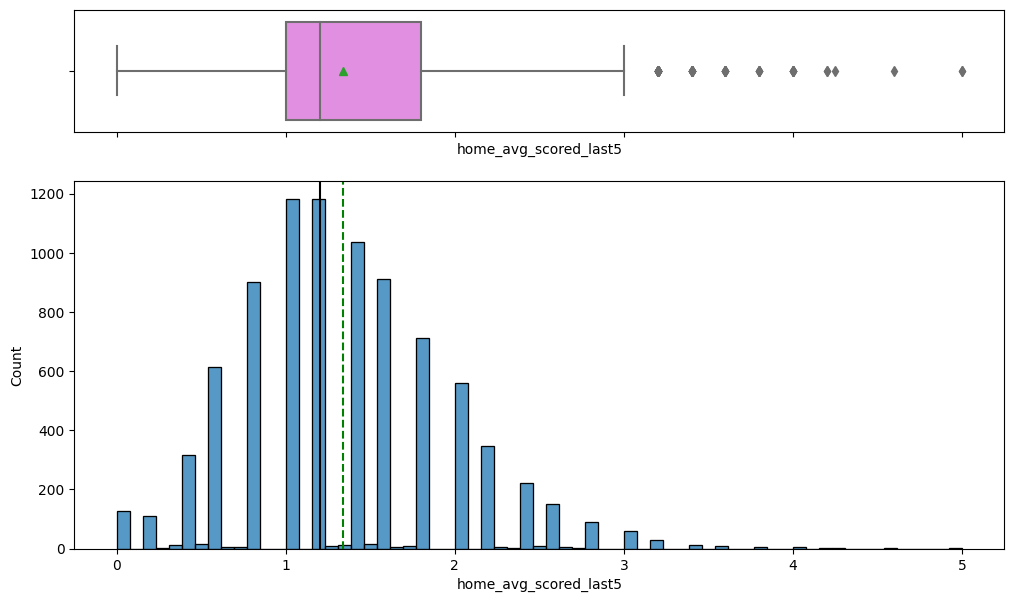

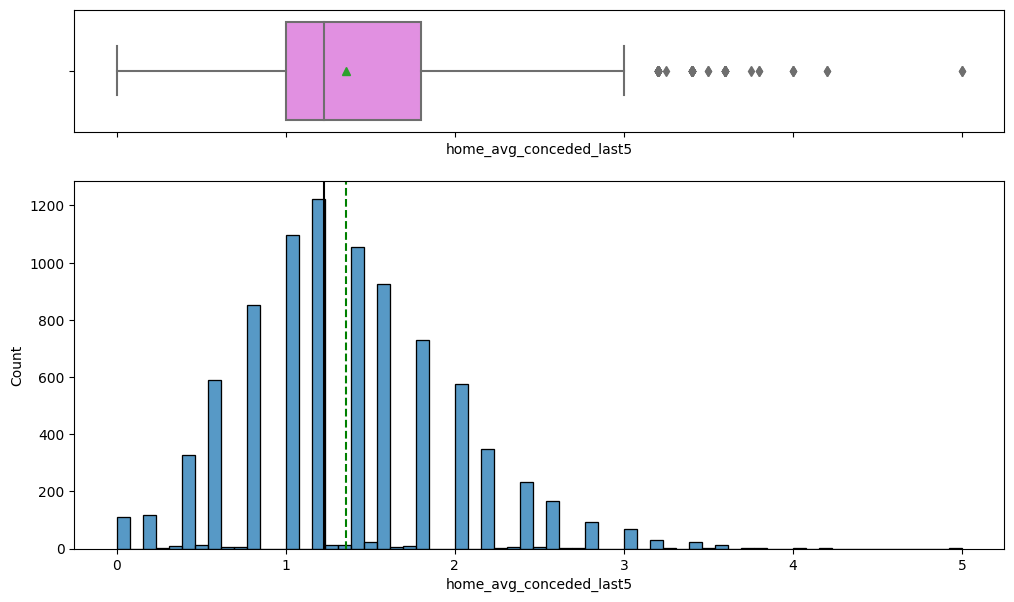

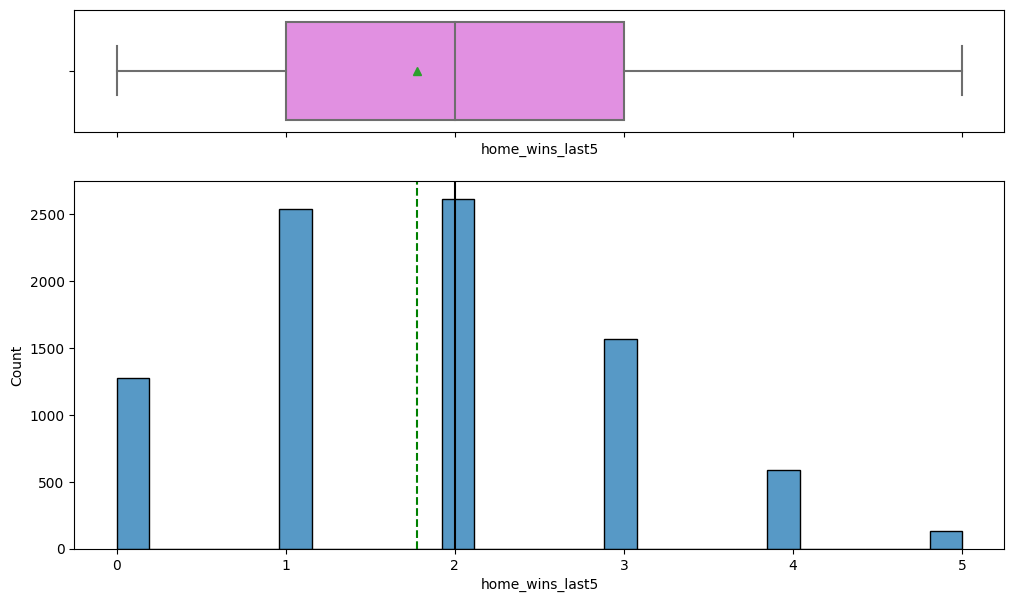

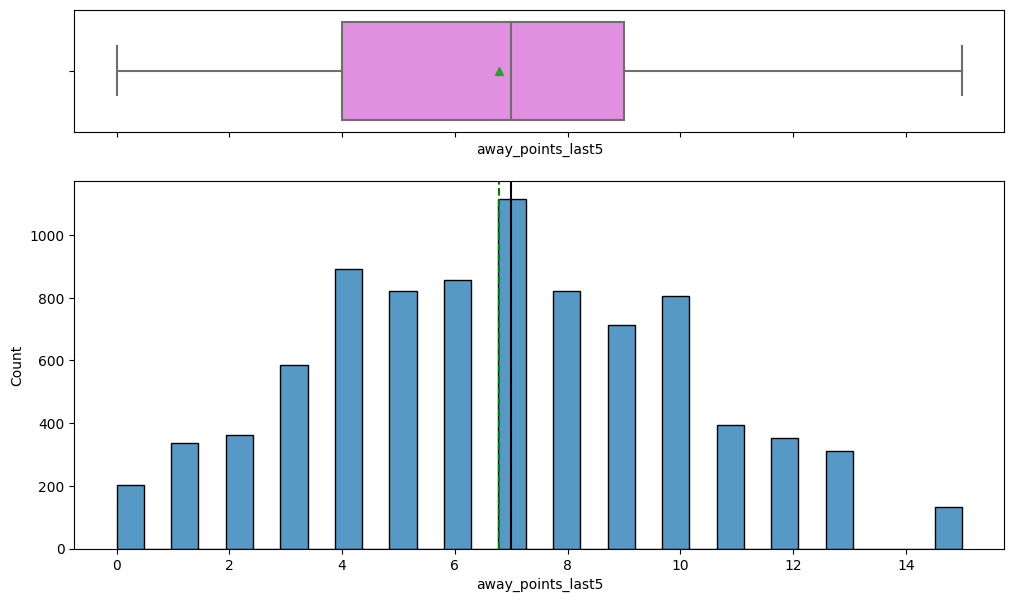

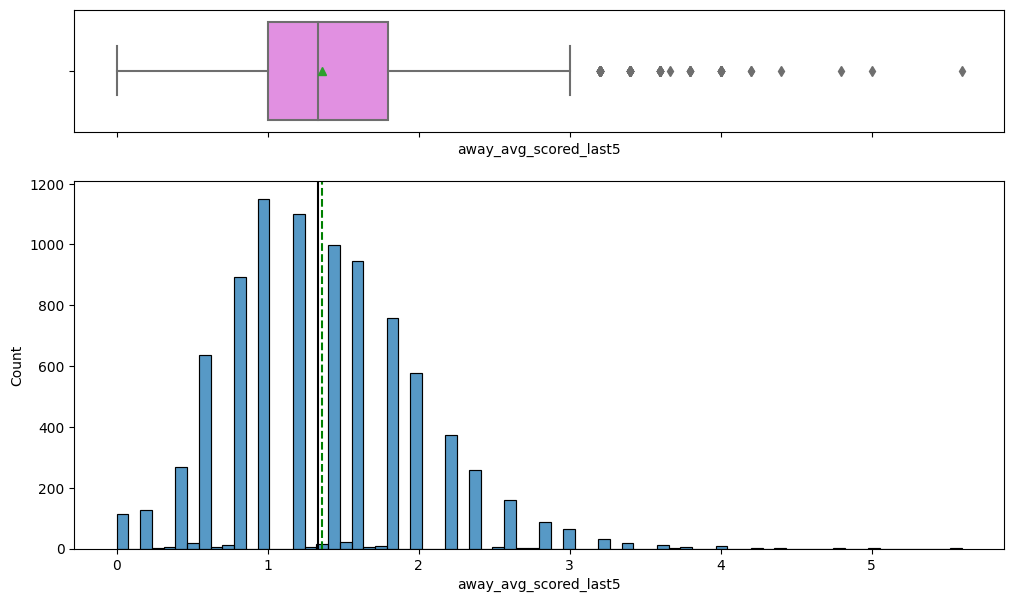

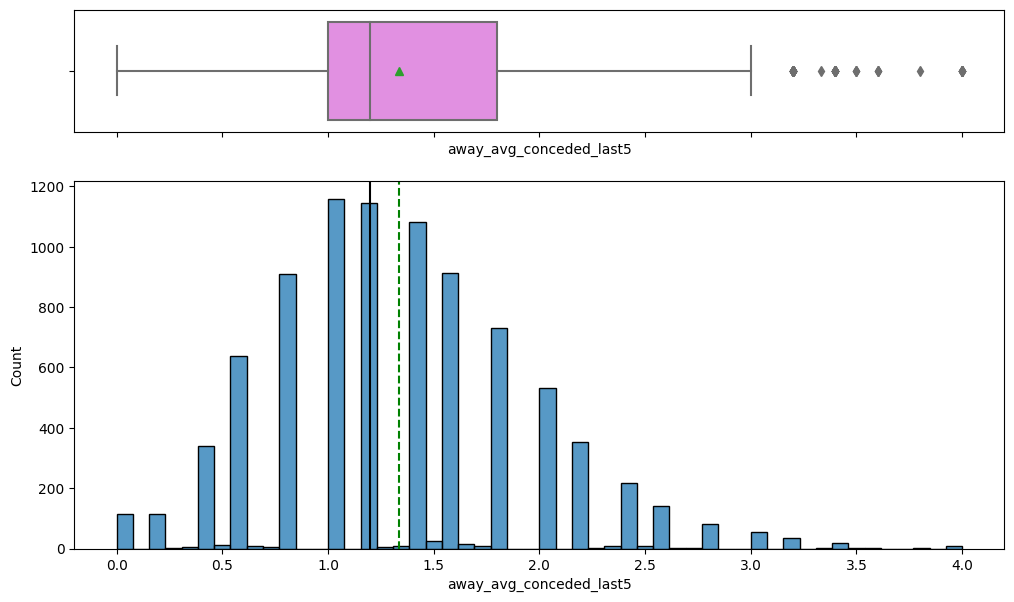

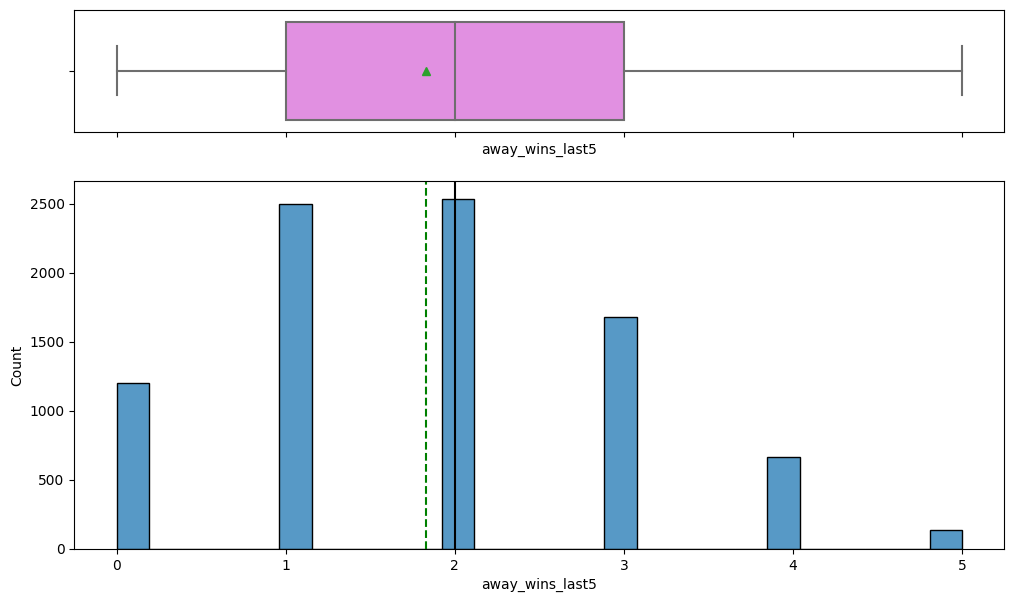

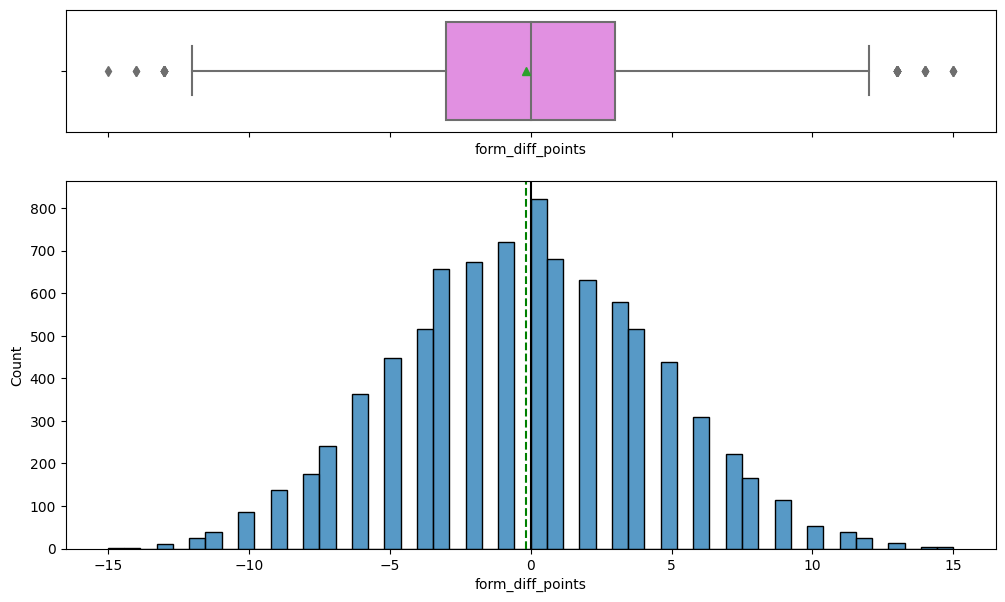

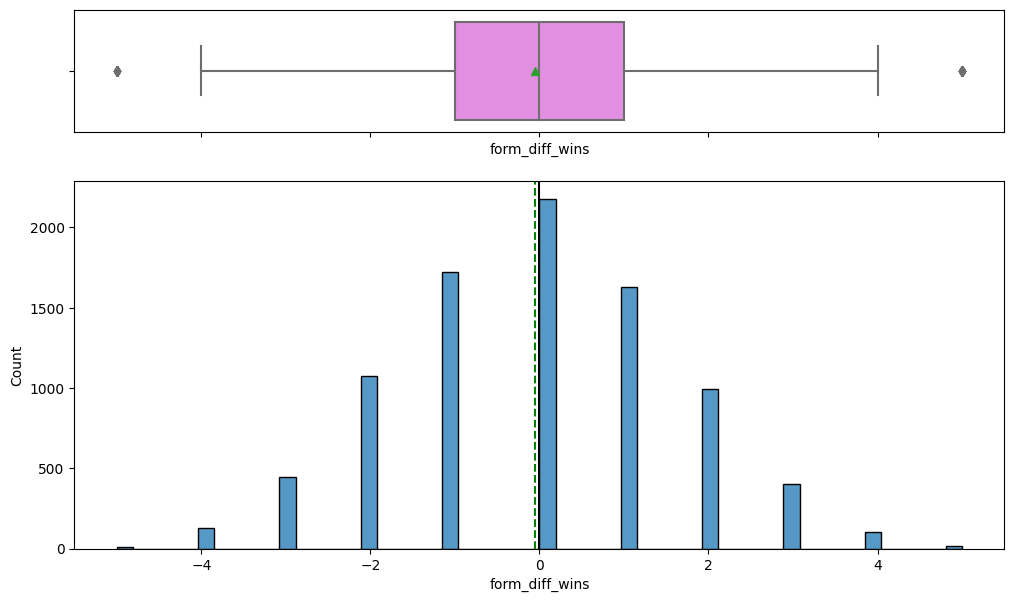

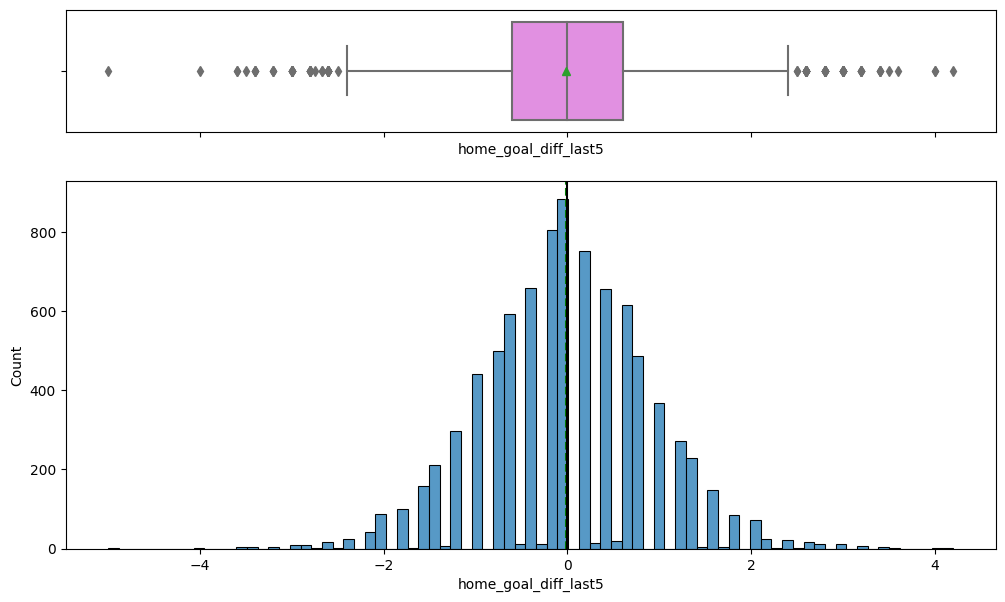

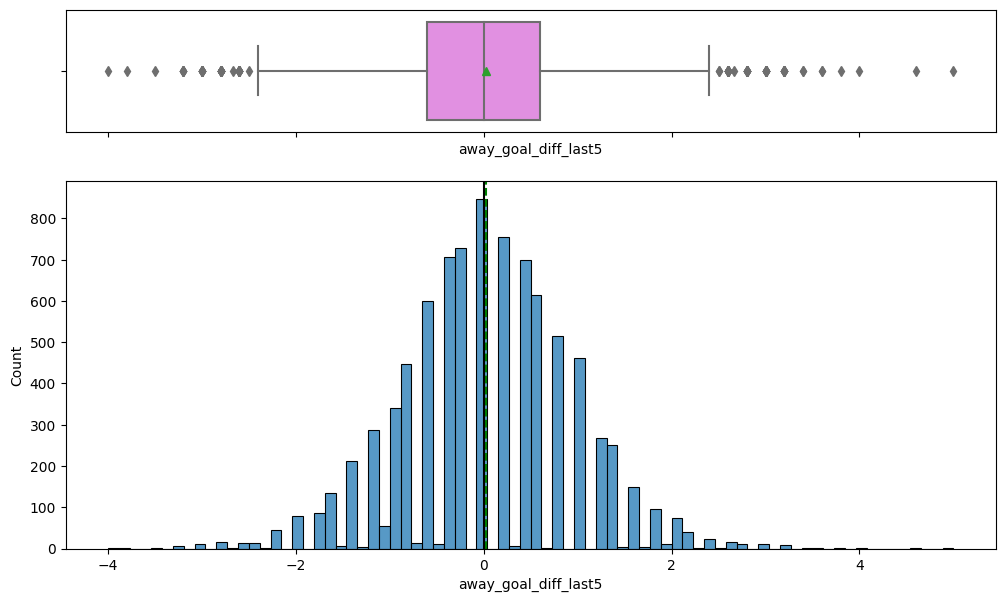

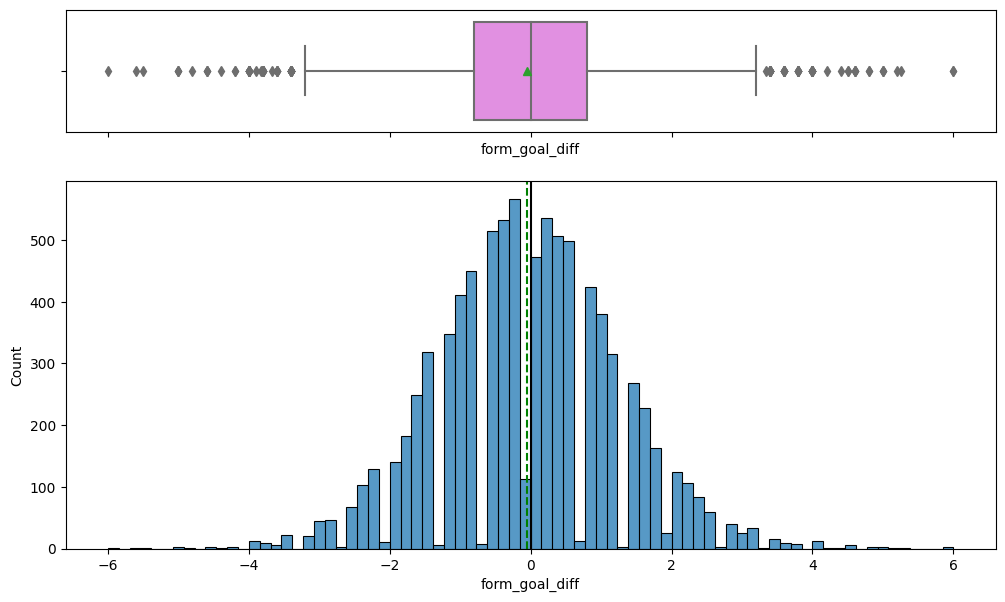

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop through the numerical columns and generate the plots
for feature in numerical_columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

### Categorical Columns

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on FULL TIME RESULTS

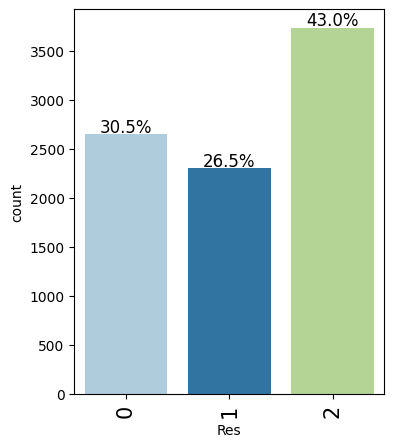

In [ ]:
labeled_barplot(df, "Res", perc=True)

## Bivariate And Multivariate Analysis

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Select only numerical columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation with target variable
correlations = numeric_df.corr()['Res'].sort_values(ascending=False)
print("Correlations with target variable:")
print(correlations)

Correlations with target variable:
Res                        1.000000
HG                         0.628918
AvgCA                      0.281603
PSCA                       0.280823
MaxCA                      0.226781
form_goal_diff             0.202250
form_diff_points           0.191567
form_diff_wins             0.181429
home_goal_diff_last5       0.155626
home_points_last5          0.138494
home_wins_last5            0.131658
PSCD                       0.131443
AvgCD                      0.128546
home_avg_scored_last5      0.123193
MaxCD                      0.114280
away_avg_conceded_last5    0.088584
Country                    0.029905
Home                       0.024299
League                     0.020979
Away                      -0.005238
away_avg_scored_last5     -0.100334
home_avg_conceded_last5   -0.107274
away_wins_last5           -0.117941
away_points_last5         -0.123573
away_goal_diff_last5      -0.127093
MaxCH                     -0.221564
PSCH                      -0.

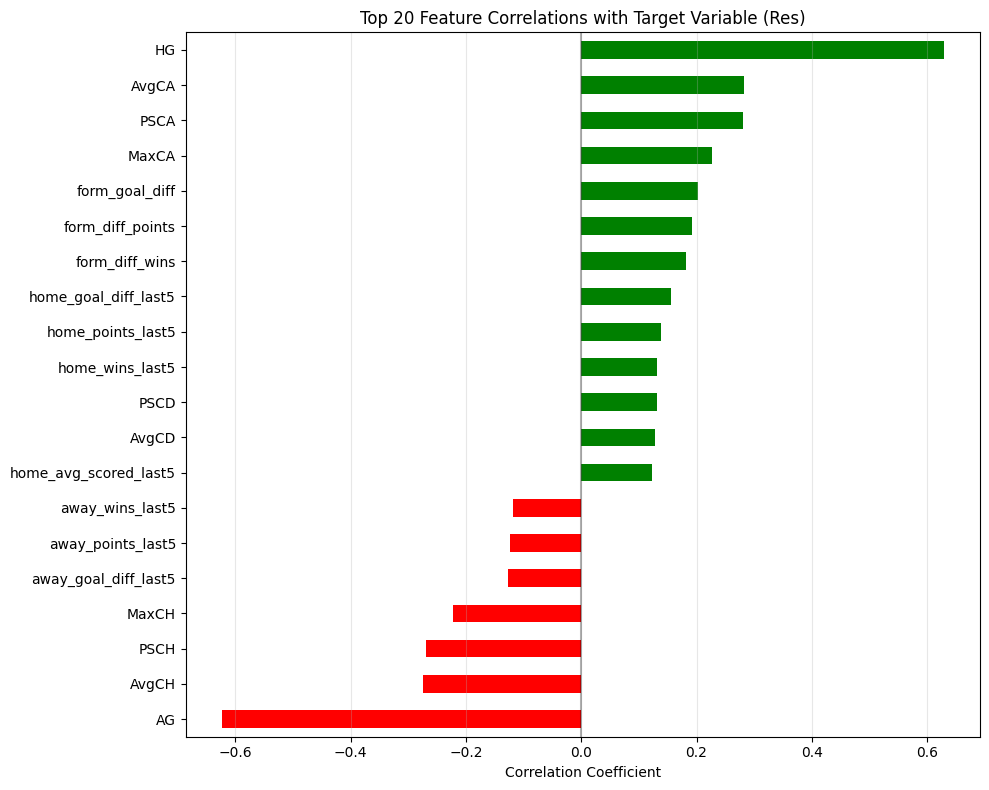

In [ ]:
#2. Visualize top 20 correlations with target
plt.figure(figsize=(10, 8))

# Get top 20 correlations by absolute value but keep original sign
top_20_abs = correlations.drop('Res').abs().nlargest(20).index
top_20_data = correlations.loc[top_20_abs].sort_values()

# Create horizontal bar plot with colors based on correlation sign
colors = ['red' if x < 0 else 'green' for x in top_20_data]
top_20_data.plot(kind='barh', color=colors)
plt.title('Top 20 Feature Correlations with Target Variable (Res)')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Filter features based on correlation threshold
threshold = 0.1
all_relevant = correlations[abs(correlations) > threshold].index.tolist()
# Separate target from features
target_column = 'Res'
# Create feature list (exclude target)
relevant_features = [col for col in all_relevant if col != target_column]
print(f"\nFeatures with |correlation| > {threshold}:")
print(f"Number of features: {len(relevant_features)}")
print(relevant_features)


Features with |correlation| > 0.1:
Number of features: 23
['HG', 'AvgCA', 'PSCA', 'MaxCA', 'form_goal_diff', 'form_diff_points', 'form_diff_wins', 'home_goal_diff_last5', 'home_points_last5', 'home_wins_last5', 'PSCD', 'AvgCD', 'home_avg_scored_last5', 'MaxCD', 'away_avg_scored_last5', 'home_avg_conceded_last5', 'away_wins_last5', 'away_points_last5', 'away_goal_diff_last5', 'MaxCH', 'PSCH', 'AvgCH', 'AG']


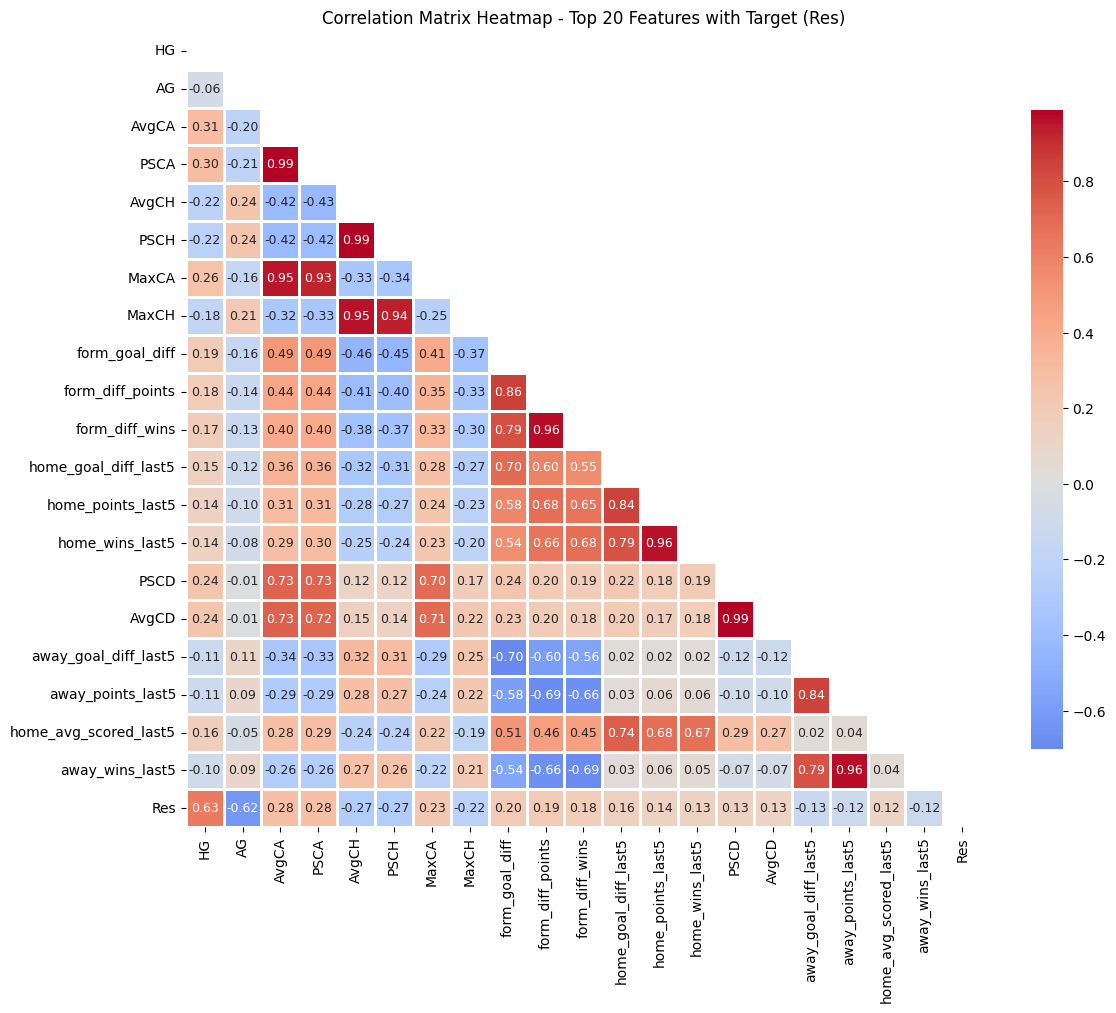

In [ ]:
# Correlation matrix for top correlated features with multicollinearity check
plt.figure(figsize=(12, 10))

# Get top 20 features correlated with Res (excluding Res itself)
top_features = correlations.drop('Res').abs().nlargest(20).index
selected_features = list(top_features) + ['Res']

# Create correlation matrix for selected features
correlation_matrix = df[selected_features].corr()

# Create heatmap with enhanced styling
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8},
            annot_kws={'size': 9})
plt.title('Correlation Matrix Heatmap - Top 20 Features with Target (Res)')
plt.tight_layout()
plt.show()


In [ ]:
# 5. Detect multicollinearity among predictors
def find_high_correlations(df, features, threshold=0.8):
    """Find pairs of features with high correlation"""
    corr_matrix = df[features].corr()
    high_corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })

    return pd.DataFrame(high_corr_pairs)

multicollinear_features = find_high_correlations(df, relevant_features, threshold=0.8)
print("\nHighly correlated feature pairs (multicollinearity):")
print(multicollinear_features)


Highly correlated feature pairs (multicollinearity):
                feature1              feature2  correlation
0                  AvgCA                  PSCA     0.986475
1                  AvgCA                 MaxCA     0.949063
2                   PSCA                 MaxCA     0.928213
3         form_goal_diff      form_diff_points     0.855191
4       form_diff_points        form_diff_wins     0.961437
5   home_goal_diff_last5     home_points_last5     0.842690
6      home_points_last5       home_wins_last5     0.961130
7                   PSCD                 AvgCD     0.986217
8                   PSCD                 MaxCD     0.959322
9                  AvgCD                 MaxCD     0.979001
10       away_wins_last5     away_points_last5     0.961587
11     away_points_last5  away_goal_diff_last5     0.839778
12                 MaxCH                  PSCH     0.937956
13                 MaxCH                 AvgCH     0.954897
14                  PSCH                 AvgCH

In [ ]:
df.head()

,Country,League,Date,Home,Away,HG,AG,Res,PSCH,PSCD,...,home_wins_last5,away_points_last5,away_avg_scored_last5,away_avg_conceded_last5,away_wins_last5,form_diff_points,form_diff_wins,home_goal_diff_last5,away_goal_diff_last5,form_goal_diff
0,7,10,2019-07-12,37,89,0,0,1,2.61,3.06,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
1,8,6,2019-07-12,9,30,1,1,1,3.40,2.99,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
2,3,10,2019-07-12,64,31,1,0,2,1.54,4.24,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
3,8,6,2019-07-13,113,110,3,2,2,2.10,3.14,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
4,7,10,2019-07-13,10,33,2,2,1,2.32,3.14,...,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country                  8702 non-null   int64         
 1   League                   8702 non-null   int64         
 2   Date                     8702 non-null   datetime64[ns]
 3   Home                     8702 non-null   int64         
 4   Away                     8702 non-null   int64         
 5   HG                       8702 non-null   int64         
 6   AG                       8702 non-null   int64         
 7   Res                      8702 non-null   int64         
 8   PSCH                     8663 non-null   float64       
 9   PSCD                     8663 non-null   float64       
 10  PSCA                     8663 non-null   float64       
 11  MaxCH                    8699 non-null   float64       
 12  MaxCD                    8699 non-

In [ ]:
"""
# Define the features to keep (based on my correlation analysis)
keep = [
    'PSCA',              # From AvgCA/PSCA/MaxCA cluster
    'PSCD',              # From PSCD/AvgCD/MaxCD cluster
    'form_diff_points',  # From form metrics cluster
    'home_points_last5', # From home form cluster
    'away_points_last5', # From away form cluster
    'PSCH',              # From MaxCH/PSCH/AvgCH cluster
]

# Add any other features that weren't highly correlated
# First, get all features that appeared in correlations
all_correlated_features = set(multicollinear_features['feature1']).union(
    set(multicollinear_features['feature2'])
)
"""

"\n# Define the features to keep (based on my correlation analysis)\nkeep = [\n    'PSCA',              # From AvgCA/PSCA/MaxCA cluster\n    'PSCD',              # From PSCD/AvgCD/MaxCD cluster\n    'form_diff_points',  # From form metrics cluster\n    'home_points_last5', # From home form cluster\n    'away_points_last5', # From away form cluster\n    'PSCH',              # From MaxCH/PSCH/AvgCH cluster\n]\n\n# Add any other features that weren't highly correlated\n# First, get all features that appeared in correlations\nall_correlated_features = set(multicollinear_features['feature1']).union(\n    set(multicollinear_features['feature2'])\n)\n"

In [ ]:
"""
# Find independent features (not in any correlation pair)
independent_features = [f for f in relevant_features if f not in all_correlated_features]

# Add independent features to keep list
keep.extend(independent_features)

# Create a new DataFrame with only selected columns
df = df[keep].copy()

print(f"Original number of features: {len(relevant_features)}")
print(f"Selected number of features: {len(keep)}")
print(f"\nColumns kept: {keep}")
print(f"\nNew DataFrame shape: {df.shape}")
"""

'\n# Find independent features (not in any correlation pair)\nindependent_features = [f for f in relevant_features if f not in all_correlated_features]\n\n# Add independent features to keep list\nkeep.extend(independent_features)\n\n# Create a new DataFrame with only selected columns\ndf = df[keep].copy()\n\nprint(f"Original number of features: {len(relevant_features)}")\nprint(f"Selected number of features: {len(keep)}")\nprint(f"\nColumns kept: {keep}")\nprint(f"\nNew DataFrame shape: {df.shape}")\n'

In [ ]:
# List of columns to keep
columns_to_keep = [
    'Country', 'League','Date','Home', 'Away','PSCA', 'PSCD', 'form_diff_points',
    'home_points_last5', 'away_points_last5', 'PSCH', 'HG',
    'home_avg_scored_last5', 'AG','Res'
]

# Keep only the specified columns
df = df[columns_to_keep]

In [ ]:
df.head()

,Country,League,Date,Home,Away,PSCA,PSCD,form_diff_points,home_points_last5,away_points_last5,PSCH,HG,home_avg_scored_last5,AG,Res
0,7,10,2019-07-12,37,89,3.07,3.06,0.0,0.0,0.0,2.61,0,0.0,0,1
1,8,6,2019-07-12,9,30,2.37,2.99,0.0,0.0,0.0,3.40,1,0.0,1,1
2,3,10,2019-07-12,64,31,5.75,4.24,0.0,0.0,0.0,1.54,1,0.0,0,2
3,8,6,2019-07-13,113,110,3.92,3.14,0.0,0.0,0.0,2.10,3,0.0,2,2
4,7,10,2019-07-13,10,33,3.49,3.14,0.0,0.0,0.0,2.32,2,0.0,2,1


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Country                   0
League                    0
Date                      0
Home                      0
Away                      0
PSCA                     39
PSCD                     39
form_diff_points          0
home_points_last5         0
away_points_last5         0
PSCH                     39
HG                        0
home_avg_scored_last5     0
AG                        0
Res                       0
dtype: int64

In [ ]:
# Display only columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

PSCA    39
PSCD    39
PSCH    39
dtype: int64


In [ ]:
# Columns to be treated with median imputation
columns_to_impute_median = [
    'PSCA','PSCD', 'PSCH'
]
# Impute median for numerical columns
for column in columns_to_impute_median:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Verify missing values after imputation and display only columns without missing values
missing_values = df.isnull().sum()
no_missing_columns = missing_values[missing_values == 0]
print(no_missing_columns)

# Reset display options back to default if needed
pd.reset_option('display.max_rows')



Country                  0
League                   0
Date                     0
Home                     0
Away                     0
PSCA                     0
PSCD                     0
form_diff_points         0
home_points_last5        0
away_points_last5        0
PSCH                     0
HG                       0
home_avg_scored_last5    0
AG                       0
Res                      0
dtype: int64


In [ ]:
# we first create a copy of the data to avoid changes to it
df = df.copy()

### Outlier Check

- Let's check for outliers in the data.

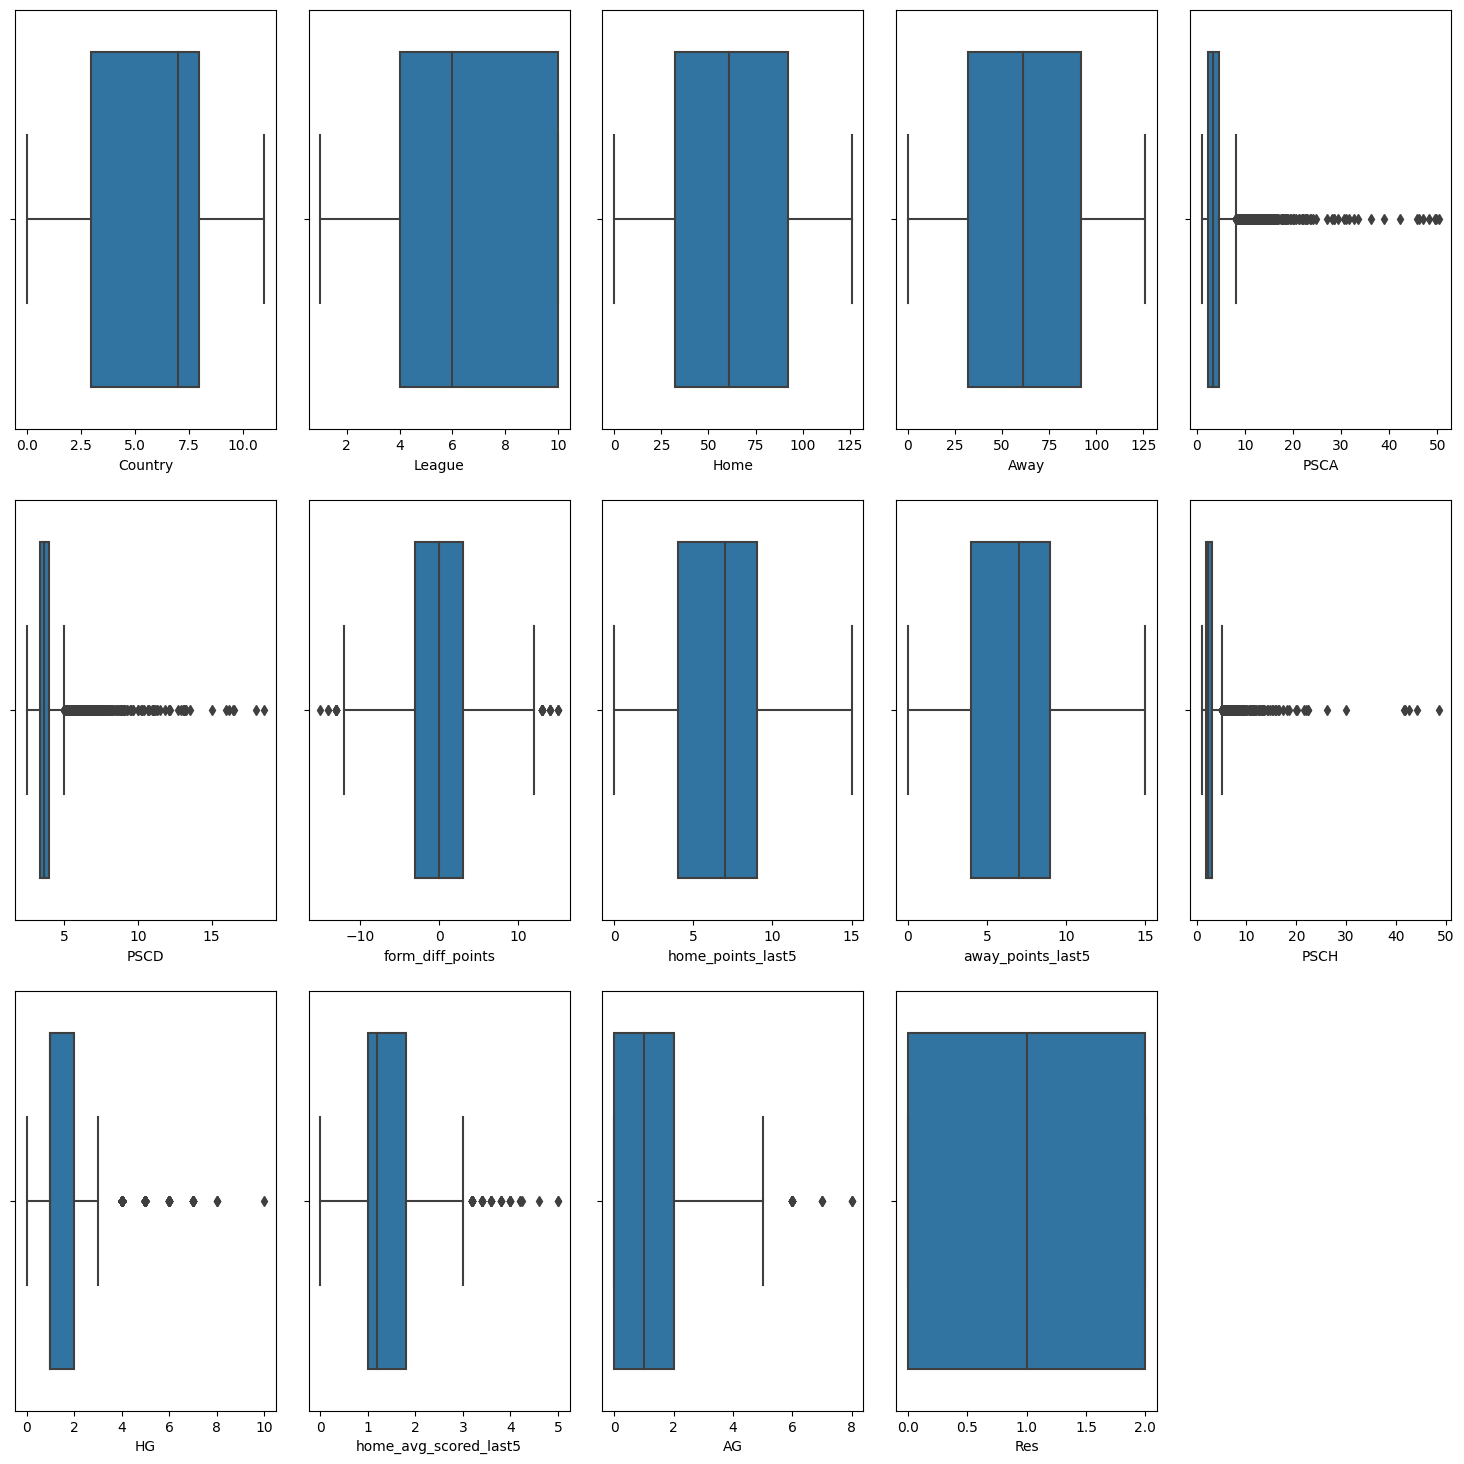

In [ ]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Treating Outliers

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

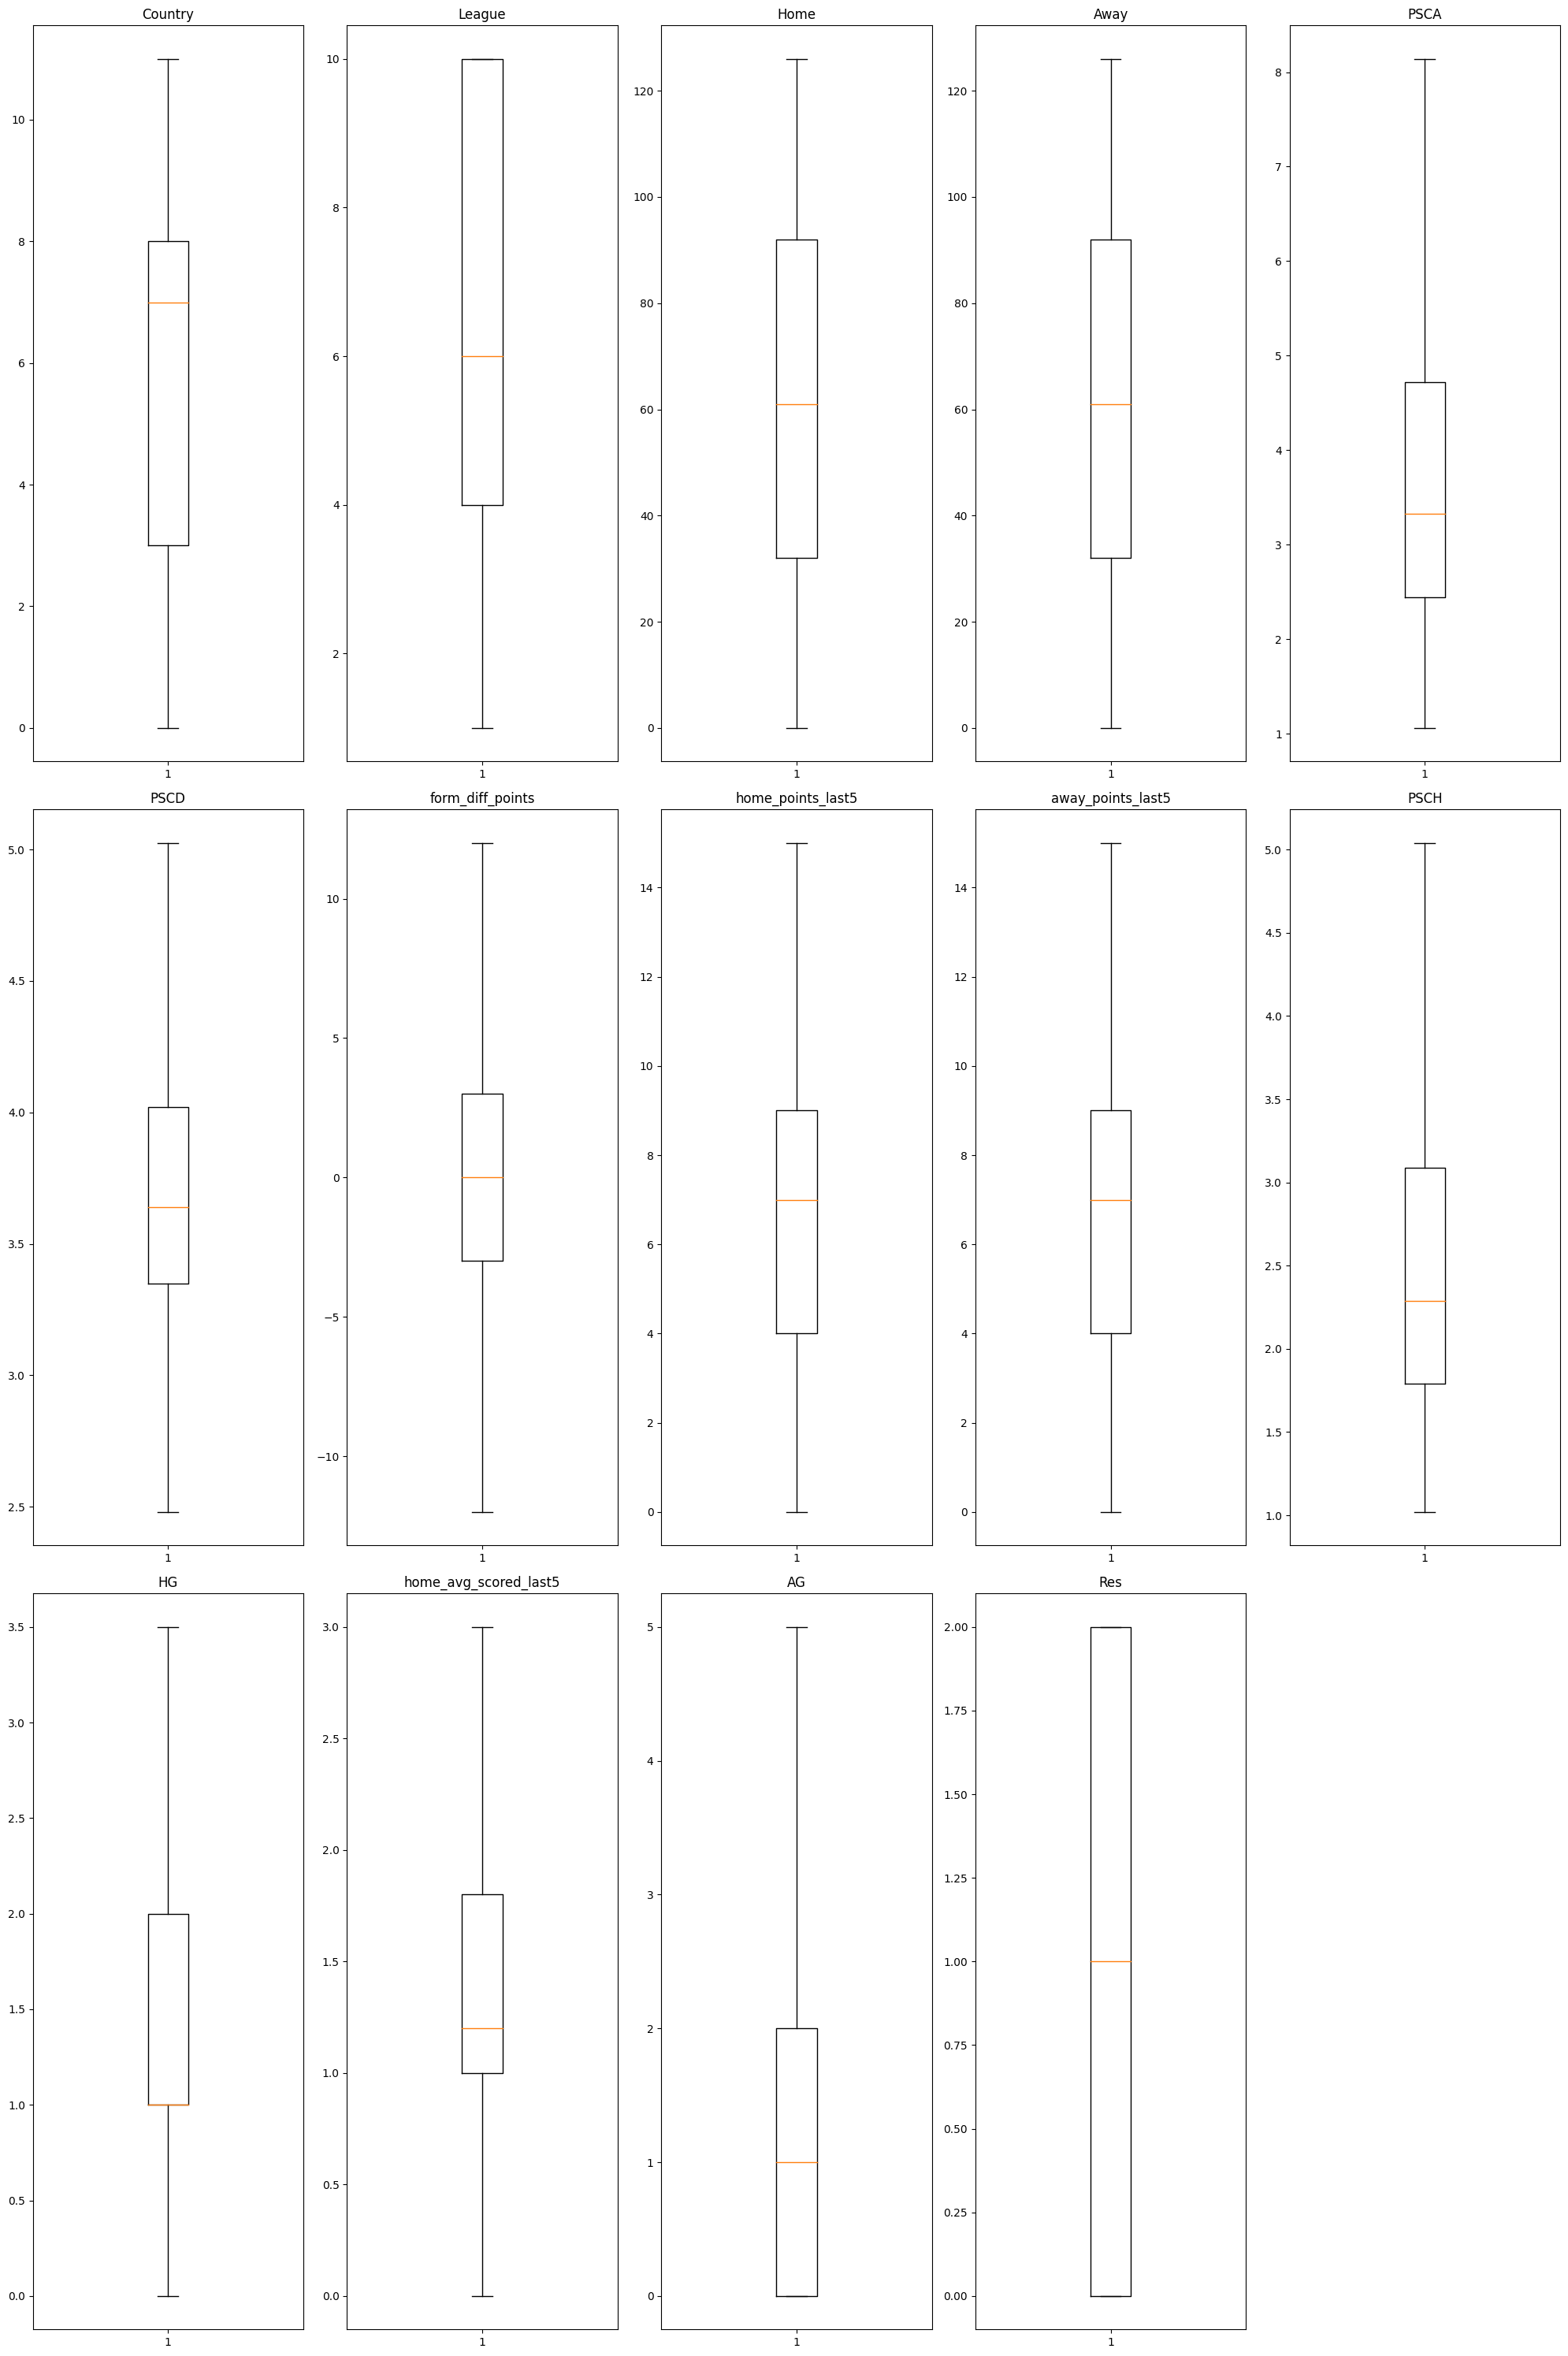

In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Split Data
* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [ ]:
X = df.drop(['Res', 'HG', 'AG', 'Date'], axis=1)  # Remove target and date/time
y = df['Res']

In [ ]:
# Keep dates separate for splitting
dates = df['Date'].copy()

In [ ]:
#Sort everything by date first
sorted_indices = dates.argsort()  # Get indices that would sort by date

X_sorted = X.iloc[sorted_indices].reset_index(drop=True)
y_sorted = y.iloc[sorted_indices].reset_index(drop=True)
dates_sorted = dates.iloc[sorted_indices].reset_index(drop=True)

In [ ]:
# Split chronologically (first 80% for training, last 20% for testing)
split_idx = int(len(X_sorted) * 0.8)

X_Train = X_sorted.iloc[:split_idx]
X_Test = X_sorted.iloc[split_idx:]
y_train = y_sorted.iloc[:split_idx]
y_test = y_sorted.iloc[split_idx:]

print(f"Training period: {dates_sorted.iloc[0].date()} to {dates_sorted.iloc[split_idx-1].date()}")
print(f"Testing period: {dates_sorted.iloc[split_idx].date()} to {dates_sorted.iloc[-1].date()}")

Training period: 2019-07-12 to 2024-03-30
Testing period: 2024-03-30 to 2025-04-28


In [ ]:
X.head()

,Country,League,Home,Away,PSCA,PSCD,form_diff_points,home_points_last5,away_points_last5,PSCH,home_avg_scored_last5
0,7,10,37,89,3.07,3.06,0.0,0.0,0.0,2.61,0.0
1,8,6,9,30,2.37,2.99,0.0,0.0,0.0,3.40,0.0
2,3,10,64,31,5.75,4.24,0.0,0.0,0.0,1.54,0.0
3,8,6,113,110,3.92,3.14,0.0,0.0,0.0,2.10,0.0
4,7,10,10,33,3.49,3.14,0.0,0.0,0.0,2.32,0.0


In [ ]:
print(X_Train.shape, X_Test.shape)

(6961, 11) (1741, 11)


In [ ]:
y.value_counts(1)

Res
2    0.429901
0    0.304987
1    0.265111
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(1)

Res
2    0.435956
0    0.299253
1    0.264790
Name: proportion, dtype: float64

In [ ]:
#FEATURE SELECTION USING TRAINING DATA
from sklearn.feature_selection import SelectKBest,mutual_info_classif

mi_scores = mutual_info_classif(X_Train, y_train, random_state=1)
feature_importance = pd.Series(mi_scores, index=X_Train.columns).sort_values(ascending=False)

print("Top 11 features by Mutual Information:")
print(feature_importance.head(11))

Top 11 features by Mutual Information:
PSCA                     0.064024
PSCH                     0.063972
Away                     0.033383
Home                     0.028969
form_diff_points         0.022109
home_points_last5        0.019792
PSCD                     0.016052
home_avg_scored_last5    0.009219
away_points_last5        0.007653
League                   0.005668
Country                  0.000000
dtype: float64


In [ ]:
# Get the top 10 features from YOUR calculation (not SelectKBest's)
top_10_features = feature_importance.head(10).index.tolist()

print("Top 10 features based on mutual information calculation:")
print(top_10_features)

# Now subset your data using these features
X_train = X_Train[top_10_features]
X_test = X_Test[top_10_features]  # Don't forget to transform test data too!

print(f"\nX_train shape before: {X_Train.shape}")
print(f"X_train shape after: {X_train.shape}")
print(f"\nX_test shape before: {X_Test.shape}")
print(f"X_test shape after: {X_test.shape}")

Top 10 features based on mutual information calculation:
['PSCA', 'PSCH', 'Away', 'Home', 'form_diff_points', 'home_points_last5', 'PSCD', 'home_avg_scored_last5', 'away_points_last5', 'League']

X_train shape before: (6961, 11)
X_train shape after: (6961, 10)

X_test shape before: (1741, 11)
X_test shape after: (1741, 10)


In [ ]:
"""
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Correlation': numeric_df.corr()['Res'],
    'MI_Score': mutual_info_classif(X_train, y_train, random_state=1)
}, index=X_train.columns)

# Add additional useful columns
comparison_df['Correlation_Abs'] = comparison_df['Correlation'].abs()
comparison_df['MI_Rank'] = comparison_df['MI_Score'].rank(ascending=False)
comparison_df['Correlation_Rank'] = comparison_df['Correlation_Abs'].rank(ascending=False)
comparison_df['Rank_Difference'] = comparison_df['Correlation_Rank'] - comparison_df['MI_Rank']

# Sort by MI Score (most important first)
comparison_df = comparison_df.sort_values('MI_Score', ascending=False)
print("COMPREHENSIVE FEATURE COMPARISON:")
print(comparison_df.head(40))  # Show top 40 by MI
"""

'\n# Create comparison dataframe\ncomparison_df = pd.DataFrame({\n    \'Correlation\': numeric_df.corr()[\'Res\'],\n    \'MI_Score\': mutual_info_classif(X_train, y_train, random_state=1)\n}, index=X_train.columns)\n\n# Add additional useful columns\ncomparison_df[\'Correlation_Abs\'] = comparison_df[\'Correlation\'].abs()\ncomparison_df[\'MI_Rank\'] = comparison_df[\'MI_Score\'].rank(ascending=False)\ncomparison_df[\'Correlation_Rank\'] = comparison_df[\'Correlation_Abs\'].rank(ascending=False)\ncomparison_df[\'Rank_Difference\'] = comparison_df[\'Correlation_Rank\'] - comparison_df[\'MI_Rank\']\n\n# Sort by MI Score (most important first)\ncomparison_df = comparison_df.sort_values(\'MI_Score\', ascending=False)\nprint("COMPREHENSIVE FEATURE COMPARISON:")\nprint(comparison_df.head(40))  # Show top 40 by MI\n'

In [ ]:
"""
# Find features with low correlation but high MI
comparison_df['Category'] = 'Medium'
comparison_df.loc[comparison_df['MI_Score'] > comparison_df['MI_Score'].quantile(0.7), 'Category'] = 'High MI'
comparison_df.loc[comparison_df['Correlation_Abs'] < 0.1, 'Category'] = 'Low Correlation'

# Find hidden gems - low correlation but high MI
hidden_gems = comparison_df[
    (comparison_df['Correlation_Abs'] < 0.1) &
    (comparison_df['MI_Score'] > comparison_df['MI_Score'].median())
].sort_values('MI_Score', ascending=False)

print("\nHIDDEN GEMS - Low Correlation but High MI:")
print("="*50)
if len(hidden_gems) > 0:
    for feature, row in hidden_gems.iterrows():
        print(f"{feature:35} | Corr: {row['Correlation']:8.4f} | MI: {row['MI_Score']:8.4f}")
else:
    print("No strong hidden gems found")
    """

'\n# Find features with low correlation but high MI\ncomparison_df[\'Category\'] = \'Medium\'\ncomparison_df.loc[comparison_df[\'MI_Score\'] > comparison_df[\'MI_Score\'].quantile(0.7), \'Category\'] = \'High MI\'\ncomparison_df.loc[comparison_df[\'Correlation_Abs\'] < 0.1, \'Category\'] = \'Low Correlation\'\n\n# Find hidden gems - low correlation but high MI\nhidden_gems = comparison_df[\n    (comparison_df[\'Correlation_Abs\'] < 0.1) &\n    (comparison_df[\'MI_Score\'] > comparison_df[\'MI_Score\'].median())\n].sort_values(\'MI_Score\', ascending=False)\n\nprint("\nHIDDEN GEMS - Low Correlation but High MI:")\nprint("="*50)\nif len(hidden_gems) > 0:\n    for feature, row in hidden_gems.iterrows():\n        print(f"{feature:35} | Corr: {row[\'Correlation\']:8.4f} | MI: {row[\'MI_Score\']:8.4f}")\nelse:\n    print("No strong hidden gems found")\n    '

In [ ]:
"""
# Take the best of both worlds - ensure we have top MI AND top correlation features
top_mi_features = feature_importance.head(18).index.tolist()  # Top 18 by MI
top_corr_features = comparison_df.nlargest(18, 'Correlation_Abs').index.tolist()  # Top 18 by correlation

# Combine and remove duplicates
hybrid_features = list(set(top_mi_features + top_corr_features))

print("HYBRID SELECTION (Top MI + Top Correlation)")
print("=" * 50)
print(f"Top 18 MI features: {len(top_mi_features)}")
print(f"Top 18 Correlation features: {len(top_corr_features)}")
print(f"Combined unique features: {len(hybrid_features)}")
"""

'\n# Take the best of both worlds - ensure we have top MI AND top correlation features\ntop_mi_features = feature_importance.head(18).index.tolist()  # Top 18 by MI\ntop_corr_features = comparison_df.nlargest(18, \'Correlation_Abs\').index.tolist()  # Top 18 by correlation\n\n# Combine and remove duplicates\nhybrid_features = list(set(top_mi_features + top_corr_features))\n\nprint("HYBRID SELECTION (Top MI + Top Correlation)")\nprint("=" * 50)\nprint(f"Top 18 MI features: {len(top_mi_features)}")\nprint(f"Top 18 Correlation features: {len(top_corr_features)}")\nprint(f"Combined unique features: {len(hybrid_features)}")\n'

In [ ]:
"""
# Show the final selection
print(f"\nFINAL HYBRID FEATURES ({len(hybrid_features)}):")
for feature in hybrid_features:
    row = comparison_df.loc[feature]
    print(f"{feature:35} | MI: {row['MI_Score']:7.4f} | Corr: {row['Correlation']:7.4f}")

X_TRAIN = X_train[hybrid_features]
X_TEST = X_test[hybrid_features]
print(f"Reduced from {X_train.shape[1]} to {X_TRAIN.shape[1]} features")
print(f"Reduced from {X_test.shape[1]} to {X_TEST.shape[1]} features")
"""

'\n# Show the final selection\nprint(f"\nFINAL HYBRID FEATURES ({len(hybrid_features)}):")\nfor feature in hybrid_features:\n    row = comparison_df.loc[feature]\n    print(f"{feature:35} | MI: {row[\'MI_Score\']:7.4f} | Corr: {row[\'Correlation\']:7.4f}")\n\nX_TRAIN = X_train[hybrid_features]\nX_TEST = X_test[hybrid_features]\nprint(f"Reduced from {X_train.shape[1]} to {X_TRAIN.shape[1]} features")\nprint(f"Reduced from {X_test.shape[1]} to {X_TEST.shape[1]} features")\n'

In [ ]:
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for only the hybrid_features
vif_data = pd.DataFrame()
vif_data["Feature"] = hybrid_features
vif_data["VIF"] = [variance_inflation_factor(X_TRAIN.values, i) for i in range(len(hybrid_features))]
vif_data["MI_Score"] = [comparison_df.loc[feature, 'MI_Score'] for feature in hybrid_features]
vif_data["Correlation"] = [comparison_df.loc[feature, 'Correlation'] for feature in hybrid_features]

print("VIF ANALYSIS FOR SELECTED FEATURES:")
print("=" * 80)
print(vif_data.sort_values("VIF", ascending=False).to_string(index=False))
"""

'\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n# Calculate VIF for only the hybrid_features\nvif_data = pd.DataFrame()\nvif_data["Feature"] = hybrid_features\nvif_data["VIF"] = [variance_inflation_factor(X_TRAIN.values, i) for i in range(len(hybrid_features))]\nvif_data["MI_Score"] = [comparison_df.loc[feature, \'MI_Score\'] for feature in hybrid_features]\nvif_data["Correlation"] = [comparison_df.loc[feature, \'Correlation\'] for feature in hybrid_features]\n\nprint("VIF ANALYSIS FOR SELECTED FEATURES:")\nprint("=" * 80)\nprint(vif_data.sort_values("VIF", ascending=False).to_string(index=False))\n'

In [ ]:
"""
# Final feature set recommendation
final_features = [
    'MaxCA_Prob',              # Best overall MI (0.084)
    'Draw_Home_Odds_Ratio',    # Good unique feature (0.075)
    'Market_Spread_CH',        # Market structure (0.066)
    'Strong_Favorite',         # Binary indicator (0.038)
    'Home_Favorite',           # Binary indicator (0.035)
    'Market_Confidence_Away',  # Market sentiment (0.049) - optional
]
print(f"Reduced from {len(hybrid_features)} to {len(final_features)} features")
print("This eliminates multicollinearity while preserving predictive power")
"""

'\n# Final feature set recommendation\nfinal_features = [\n    \'MaxCA_Prob\',              # Best overall MI (0.084)\n    \'Draw_Home_Odds_Ratio\',    # Good unique feature (0.075)\n    \'Market_Spread_CH\',        # Market structure (0.066)\n    \'Strong_Favorite\',         # Binary indicator (0.038)\n    \'Home_Favorite\',           # Binary indicator (0.035)\n    \'Market_Confidence_Away\',  # Market sentiment (0.049) - optional\n]\nprint(f"Reduced from {len(hybrid_features)} to {len(final_features)} features")\nprint("This eliminates multicollinearity while preserving predictive power")\n'

In [ ]:
"""
X_TRAIN = X_train[final_features]
X_TEST = X_test[final_features]
print(f"Reduced from {X_train[hybrid_features].shape[1]} to {X_TRAIN.shape[1]} features")
print(f"Reduced from {X_test[hybrid_features].shape[1]} to {X_TEST.shape[1]} features")
"""

'\nX_TRAIN = X_train[final_features]\nX_TEST = X_test[final_features]\nprint(f"Reduced from {X_train[hybrid_features].shape[1]} to {X_TRAIN.shape[1]} features")\nprint(f"Reduced from {X_test[hybrid_features].shape[1]} to {X_TEST.shape[1]} features")\n'

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    # Make predictions
    pred = model.predict(predictors)

    # Compute metrics
    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred, average='weighted')  # Adjusted for multiclass
    precision = precision_score(target, pred, average='weighted')  # Adjusted for multiclass
    f1 = f1_score(target, pred, average='weighted')  # Adjusted for multiclass

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    # Make predictions
    y_pred = model.predict(predictors)

    # Get confusion matrix
    cm = confusion_matrix(target, y_pred)

    # Dynamically reshape the labels based on the confusion matrix size
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape)  # reshape based on the actual size of cm

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### Random Forest

In [ ]:
# Initialize with smart defaults
rf_estimator = RandomForestClassifier(
    class_weight='balanced',
    random_state=1,
    n_jobs=-1,
    oob_score=True  # Get out-of-bag score for free
)

# Comprehensive parameter grid
parameters = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10],
    "min_samples_split": [15, 20, 30],
    "min_samples_leaf": [5, 10, 15],
    "max_features": [0.3, 0.5, 'sqrt'],
    "max_samples": [0.7, 0.8],
    "bootstrap": [True, False]
}

# Use appropriate scoring for 3-class
grid_obj = GridSearchCV(
    rf_estimator,
    parameters,
    scoring='accuracy',  # Simple and clear for multiclass
    cv=5,
    n_jobs=-1,
    verbose=2,  # See progress
    refit=True  # Will refit best model on entire training set
)

print("Starting Grid Search...")
grid_obj.fit(X_train, y_train)

# Results
print(f"\nBest Parameters: {grid_obj.best_params_}")
print(f"Best CV Score: {grid_obj.best_score_:.3f}")
print(f"OOB Score (if available): {grid_obj.best_estimator_.oob_score_:.3f}")

# Evaluate
rf = grid_obj.best_estimator_

Starting Grid Search...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=5, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=30, n_estimators=100; total time=   0.8s


#### Checking model performance on training set

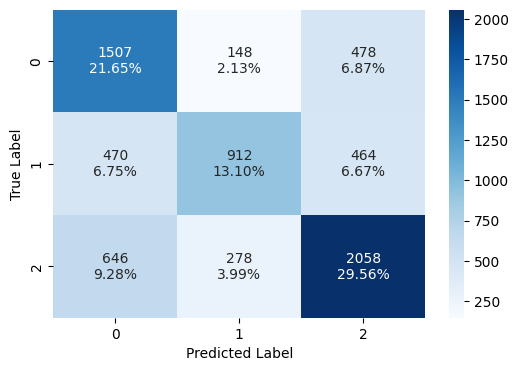

In [ ]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.643155  0.643155   0.650681  0.640864


#### Checking model performance on testing set

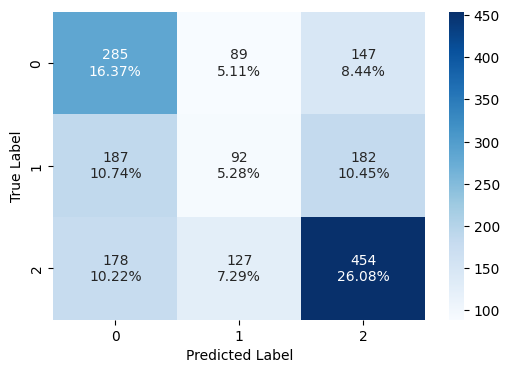

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.477312  0.477312   0.463081  0.465733

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=15, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=15, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=15, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=15, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=15, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=15, min_samples_sp

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.551789  0.551789   0.577307  0.505202
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.485353  0.485353    0.43751  0.433414


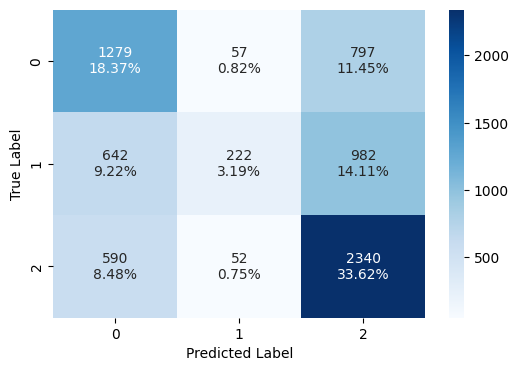

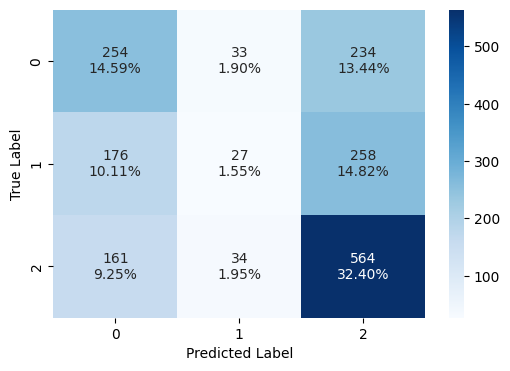

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix training set
confusion_matrix_sklearn(gb_classifier,X_train,y_train)
#Creating confusion matrix testing set
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

### XGBoost Classifier

In [ ]:
# Train XGBoost with proper parameters for multi-class
xgb_classifier = XGBClassifier(
    random_state=1,
    eval_metric='mlogloss',  # Better for multi-class than 'error'
    objective='multi:softprob',  # For multi-class probability
    num_class=3,  # Specify 3 classes
    # Add regularization to prevent overfitting
    max_depth=4,  # Limit tree depth
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    n_jobs=-1
)

# Train on proper data (not converted to int!)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_class=3, num_parallel_tree=None, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.576641  0.576641   0.610587  0.535273
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.489374  0.489374   0.452209  0.440291


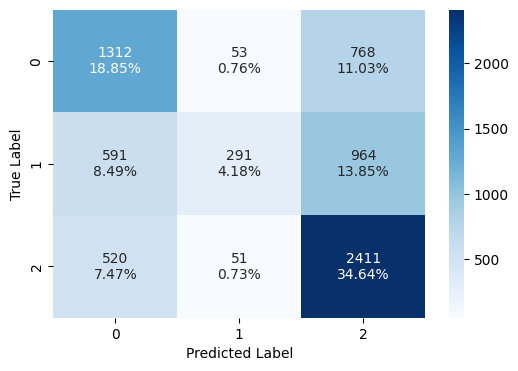

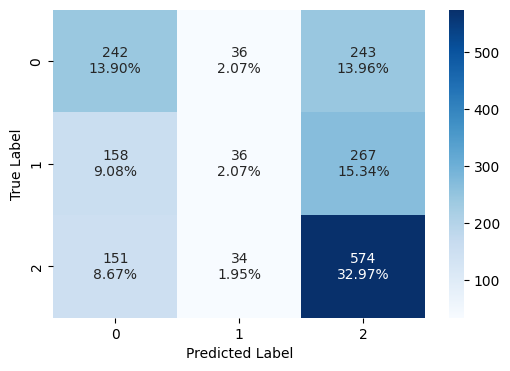

In [ ]:
#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier, X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier, X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix on training set
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)
#Creating confusion matrix on testing set
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

**Tuning Gradient Boosting Classifier**

In [ ]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

gbc = GradientBoostingClassifier(random_state=1)

parameters = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "min_samples_split": [20, 40, 60],
    "subsample": [0.7, 0.8, 0.9],
    "max_features": ['sqrt', 0.7, 0.8]
}

acc_scorer = make_scorer(accuracy_score)

gbc_tuned = RandomizedSearchCV(
    gbc,
    parameters,
    n_iter=30,  # Try 30 random combinations instead of all
    scoring=acc_scorer,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=1
)

gbc_tuned.fit(X_train, y_train)
print(f"Best score: {gbc_tuned.best_score_:.3f}")
print(f"Best params: {gbc_tuned.best_params_}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.506
Best params: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 20, 'max_features': 0.8, 'max_depth': 3, 'learning_rate': 0.01}


Training performance:
    Accuracy    Recall  Precision        F1
0  0.515587  0.515587   0.508025  0.451247
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.496841  0.496841   0.444576  0.430425


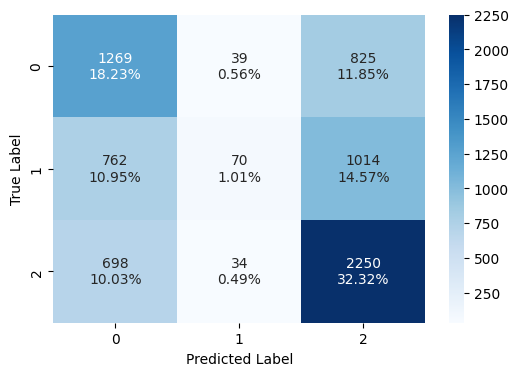

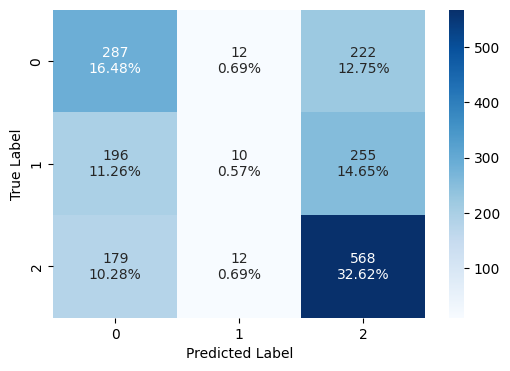

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix for training
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)
#Creating confusion matrix for testing
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

### Stacking Classifier

- Stacking classifier stacks the output of individual estimators and use a classifier to compute the final prediction
- Stacking allows using the strength of each estimator by using their output as input of a final estimator

In [ ]:
estimators = [("Gradient Boosting", gb_classifier), ("Etreme Gradient Boost Classifier",xgb_classifier)]

final_estimator = gbc_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


StackingClassifier(estimators=[('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Etreme Gradient Boost Classifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_typ...
                   final_estimator=RandomizedSearchCV(cv=3,
                                                      estimator=GradientBoostingClassifier(random_state=1),
                                                      n_iter=30, n_jobs=-1,
                                                      param_distributions={'learning_rate': [0.01,
                                                                                             0.05,
                                                                                             0.1],
                                                                           'max_depth': [3,
                                                                                         4,
                                                                                         5],
                                                                           'max_features': ['sqrt',
                                                                                            0.7,
                                                                                            0.8],
                                                                           'min_samples_split': [20,
                                                                                                 40,
                                                                                                 60],
                                                                           'n_estimators': [100,
                                                                                            200,
                                                                                            300],
                                                                           'subsample': [0.7,
                                                                                         0.8,
                                                                                         0.9]},
                                                      random_state=1,
                                                      scoring=make_scorer(accuracy_score),
                                                      verbose=1))

Training performance:
    Accuracy    Recall  Precision        F1
0  0.528803  0.528803   0.652445  0.447381
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.496267  0.496267   0.362708  0.418774


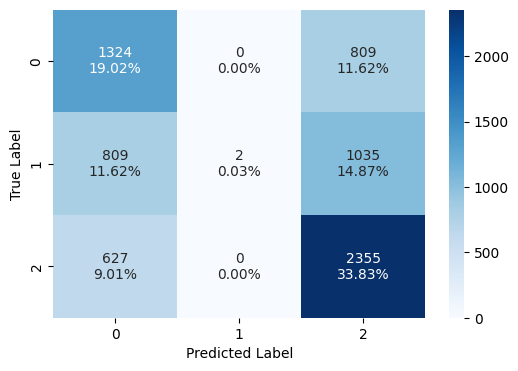

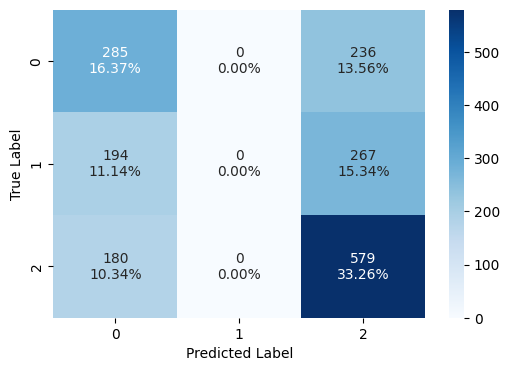

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier, X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier, X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix for train set
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)
#Creating confusion matrix for test set
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

**Comparing all models**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [

        rf_model_train_perf.T,

        gb_classifier_model_train_perf.T,

        xgb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Random Forest",

    "Gradient Boost Classifier",

    "XGBoost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest,Gradient Boost Classifier,XGBoost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,0.643155,0.551789,0.576641,0.515587,0.528803
Recall,0.643155,0.551789,0.576641,0.515587,0.528803
Precision,0.650681,0.577307,0.610587,0.508025,0.652445
F1,0.640864,0.505202,0.535273,0.451247,0.447381


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [

        rf_model_test_perf.T,

        gb_classifier_model_test_perf.T,

        xgb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,

    ],
    axis=1,
)
models_test_comp_df.columns = [

    "Random Forest",

    "Gradient Boost Classifier",

    "XGBoost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",

]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest,Gradient Boost Classifier,XGBoost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,0.477312,0.485353,0.489374,0.496841,0.496267
Recall,0.477312,0.485353,0.489374,0.496841,0.496267
Precision,0.463081,0.437510,0.452209,0.444576,0.362708
F1,0.465733,0.433414,0.440291,0.430425,0.418774


## Saving Tuned Gradient Boost Model For Deployment

In [ ]:
import joblib
# Save the model to a .pkl file
joblib.dump(gbc_tuned, 'model.pkl')

['model.pkl']